In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for interactive visualizations
#!pip install plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go

#!pip install bubbly
from bubbly.bubbly import bubbleplot
!pip install pandas-visual-analysis
from pandas_visual_analysis import VisualAnalysis
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
!pip install pmdarima
import pmdarima as pm

!pip install statsmodels
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.tseries.offsets import DateOffset

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Import dataset

In [2]:
df = pd.read_excel("CO2 dataset.xlsx",parse_dates=True)
df

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542
...,...,...
210,2010.0,15.60000
211,2011.0,15.60000
212,2012.0,14.80000
213,2013.0,14.70000


# EDA PROCESS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    float64
 1   CO2     215 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [4]:
df.shape

(215, 2)

In [5]:
df.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [6]:
df.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [7]:
df.count()

Year    215
CO2     215
dtype: int64

In [8]:
df.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


In [9]:
df.nunique()

Year    215
CO2     170
dtype: int64

<AxesSubplot:>

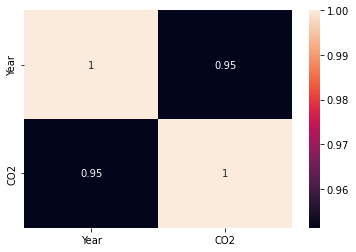

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.isna().sum()

Year    0
CO2     0
dtype: int64

In [12]:
#Mean Imputation
mean = df['Year'].mean()
print(mean)
mean = df['CO2'].mean()
print(mean)

1907.0
6.741970186046512


In [13]:
df.mean()
df.var()

Year    3870.000000
CO2       42.542183
dtype: float64

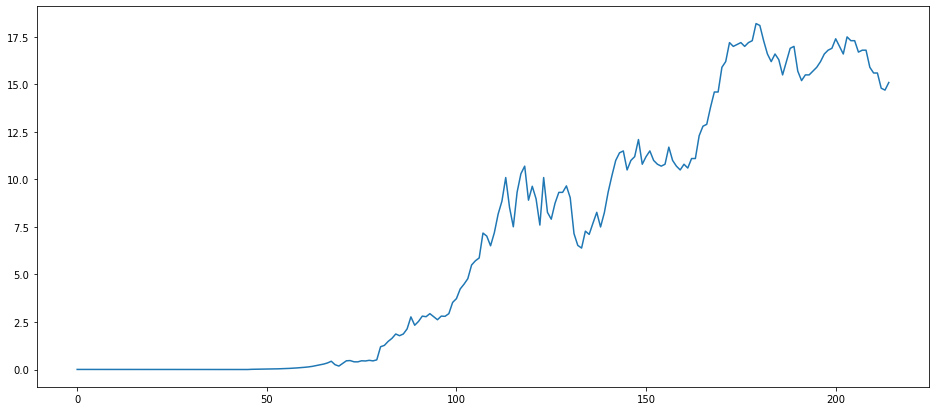

In [14]:
df['CO2'].plot(figsize=(16,7));

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

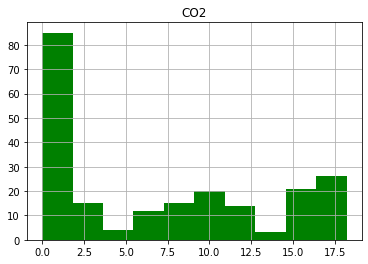

In [15]:
# histogram 
df.hist(['CO2'],color='green')

<AxesSubplot:xlabel='CO2', ylabel='Density'>

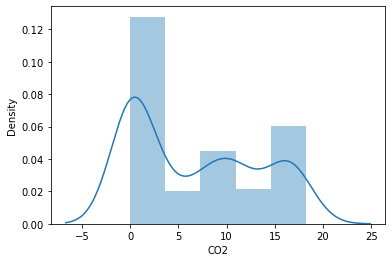

In [16]:
sns.distplot(df['CO2'])  #Density plot

# Data Preprocessing

In [17]:
df['Year']=pd.to_datetime(df["Year"],format="%Y")
df.head()

,Year,CO2
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    215 non-null    datetime64[ns]
 1   CO2     215 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [19]:
df.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


In [20]:
df.dtypes

Year    datetime64[ns]
CO2            float64
dtype: object

In [21]:
df

,Year,CO2
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542
...,...,...
210,2010-01-01,15.60000
211,2011-01-01,15.60000
212,2012-01-01,14.80000
213,2013-01-01,14.70000


{'whiskers': [<matplotlib.lines.Line2D at 0x2a580bbbe80>,
 'caps': [<matplotlib.lines.Line2D at 0x2a580bc74c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a580bbbaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a580bc7be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a580bc7f70>],
 'means': []}

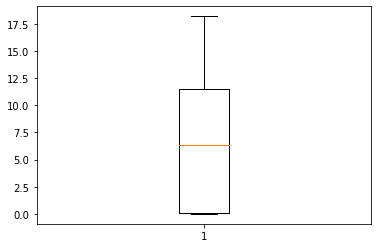

In [22]:
plt.boxplot(df['CO2'])

<AxesSubplot:>

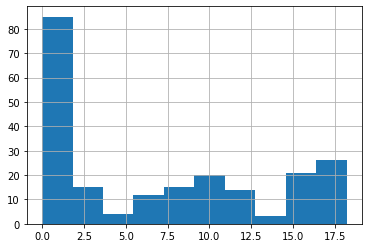

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
df['CO2'].hist()

<AxesSubplot:xlabel='CO2', ylabel='Density'>

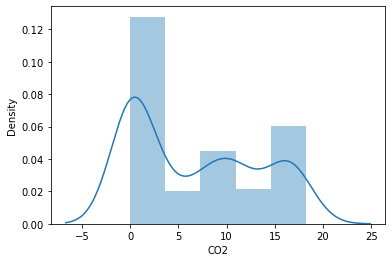

In [24]:
sns.distplot(df['CO2'])  #Density plot

# Transformations

(array([49.,  9.,  8., 14.,  2.,  8., 13., 16., 44., 52.]),
 array([-3.42876033, -2.68046641, -1.93217249, -1.18387857, -0.43558464,
         0.31270928,  1.0610032 ,  1.80929713,  2.55759105,  3.30588497,
         4.0541789 ]),
 <BarContainer object of 10 artists>)

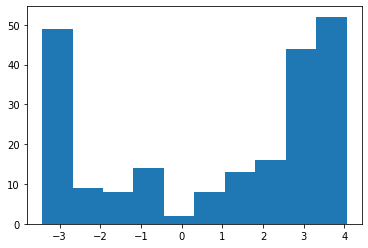

In [25]:
#Box_Cox Transform
df['co2_boxcox'] ,_ =stats.boxcox(df['CO2'])
plt.hist(df.co2_boxcox)

(array([ 28.,  18.,   6.,   5.,   6.,  11.,   6.,  17.,  18., 100.]),
 array([-6.34813949, -5.42318338, -4.49822727, -3.57327117, -2.64831506,
        -1.72335895, -0.79840284,  0.12655327,  1.05150938,  1.97646549,
         2.90142159]),
 <BarContainer object of 10 artists>)

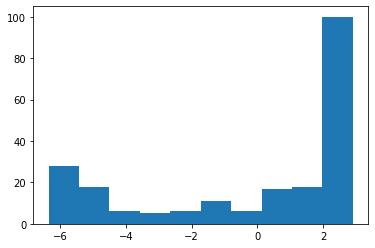

In [26]:
#Log Transform
df["logCO2"]=pd.Series(np.log(df.CO2))
plt.hist(df.logCO2)

In [27]:
#square root transform
df['sqr_co2']=np.sqrt(df['CO2'])

(array([65., 15.,  4., 15.,  4.,  7., 20., 33.,  8., 44.]),
 array([0.041833  , 0.46426428, 0.88669556, 1.30912684, 1.73155812,
        2.1539894 , 2.57642068, 2.99885196, 3.42128324, 3.84371452,
        4.2661458 ]),
 <BarContainer object of 10 artists>)

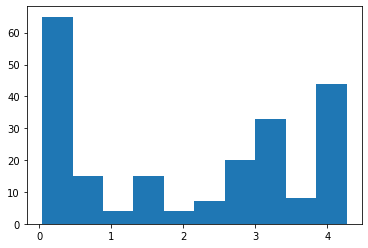

In [28]:
plt.hist(df.sqr_co2)

(array([166.,   3.,   0.,  19.,   8.,   5.,   4.,   3.,   4.,   3.]),
 array([5.49450549e-02, 5.71923077e+01, 1.14329670e+02, 1.71467033e+02,
        2.28604396e+02, 2.85741758e+02, 3.42879121e+02, 4.00016484e+02,
        4.57153846e+02, 5.14291209e+02, 5.71428571e+02]),
 <BarContainer object of 10 artists>)

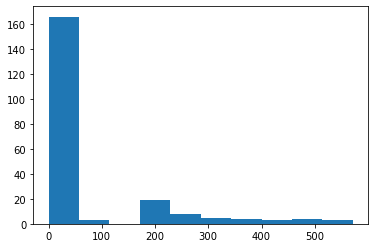

In [29]:
#Reciprocal transformation
df['Rec_co2']=1/(df['CO2'])
plt.hist(df.Rec_co2)

(array([181.,   8.,  10.,   8.,   6.,   0.,   0.,   0.,   0.,   2.]),
 array([1.00175153e+00, 8.01972764e+06, 1.60394543e+07, 2.40591809e+07,
        3.20789076e+07, 4.00986342e+07, 4.81183608e+07, 5.61380875e+07,
        6.41578141e+07, 7.21775408e+07, 8.01972674e+07]),
 <BarContainer object of 10 artists>)

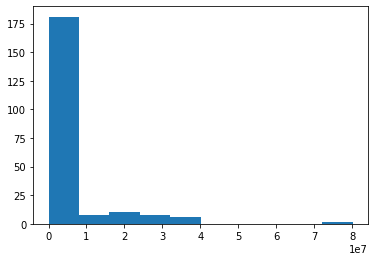

In [30]:
#exponential transform
df['Exp_co2']=np.exp(df['CO2'])
plt.hist(df.Exp_co2)

# Visualization

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'co2_boxcox'}>],
       [<AxesSubplot:title={'center':'logCO2'}>,
        <AxesSubplot:title={'center':'sqr_co2'}>,
        <AxesSubplot:title={'center':'Rec_co2'}>],
       [<AxesSubplot:title={'center':'Exp_co2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

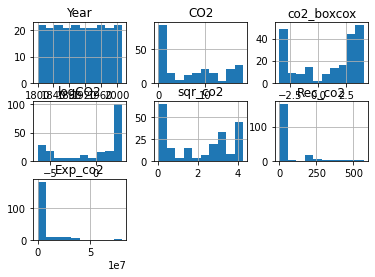

In [31]:
df.hist()

In [32]:
#Since we didnot get any conclusive evidence of being normal distribution. We have decided to move on without transforming it to normal distribution

In [33]:
df

,Year,CO2,co2_boxcox,logCO2,sqr_co2,Rec_co2,Exp_co2
0,1800-01-01,0.00568,-3.094412,-5.170804,0.075366,176.056338,1.005696e+00
1,1801-01-01,0.00561,-3.098401,-5.183205,0.074900,178.253119,1.005626e+00
2,1802-01-01,0.00555,-3.101852,-5.193957,0.074498,180.180180,1.005565e+00
3,1803-01-01,0.00548,-3.105915,-5.206650,0.074027,182.481752,1.005495e+00
4,1804-01-01,0.00542,-3.109430,-5.217659,0.073621,184.501845,1.005435e+00
...,...,...,...,...,...,...,...
210,2010-01-01,15.60000,3.767993,2.747271,3.949684,0.064103,5.956538e+06
211,2011-01-01,15.60000,3.767993,2.747271,3.949684,0.064103,5.956538e+06
212,2012-01-01,14.80000,3.672451,2.694627,3.847077,0.067568,2.676445e+06
213,2013-01-01,14.70000,3.660226,2.687847,3.834058,0.068027,2.421748e+06


In [34]:
df1= df.drop(['co2_boxcox', 'logCO2','Rec_co2','sqr_co2','Exp_co2'],axis=1)
df1

,Year,CO2
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542
...,...,...
210,2010-01-01,15.60000
211,2011-01-01,15.60000
212,2012-01-01,14.80000
213,2013-01-01,14.70000


In [35]:
df1 = df1.set_index('Year')

In [36]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df1[variable], dist="norm", plot=plt)

    sns.set_style(style='white')
    plt.show()

# Scaling Transform

Mean: 6.741970186046512
Standard Deviation: 6.522436853526819


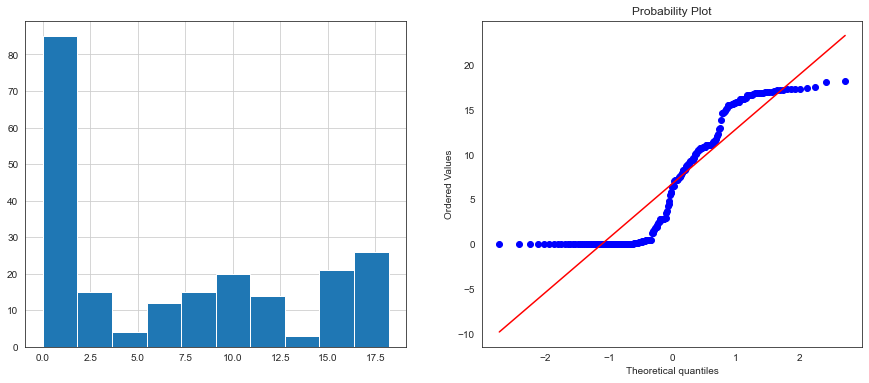

In [37]:
df1= df1[['CO2']]

print('Mean:', df1['CO2'].mean())
print('Standard Deviation:', df1['CO2'].std())

sns.set_style(style='white')
diagnostic_plots(df,'CO2')

# Standard Scaling Transform

Mean: 2.003565272346794e-16
Standard Deviation: 1.0023337254608682


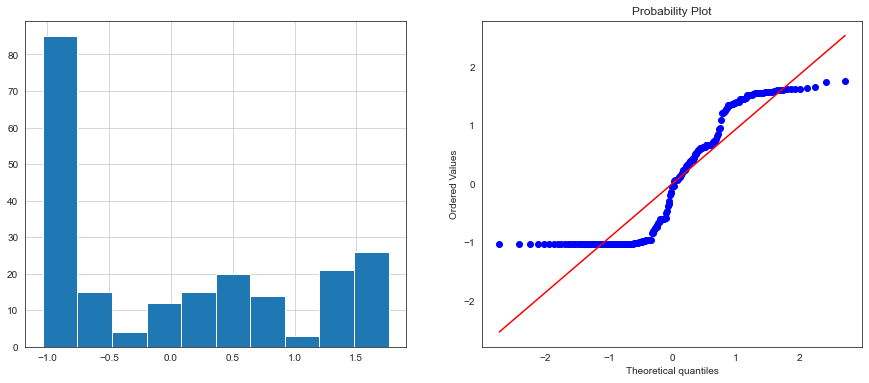

In [38]:
standard_scaler = StandardScaler()
df1['CO2_scaled'] = standard_scaler.fit_transform(df1[['CO2']])

print('Mean:', df1['CO2_scaled'].mean())
print('Standard Deviation:', df1['CO2_scaled'].std())

diagnostic_plots(df1,'CO2_scaled')

Mean: 0.37037738167387046
Standard Deviation: 0.3584101138036251


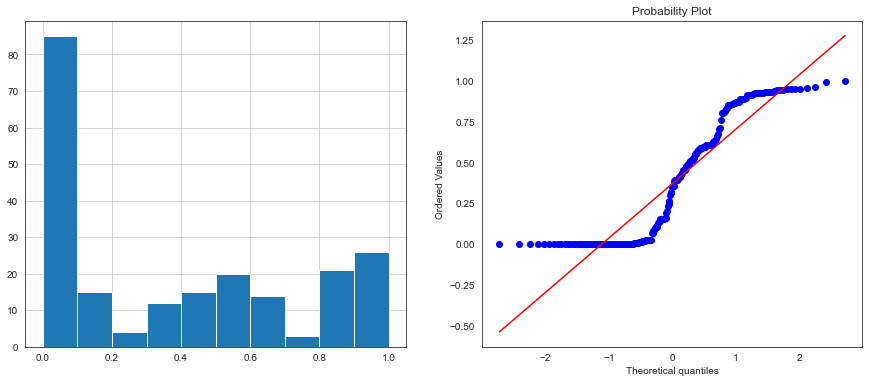

In [39]:
minmax_scaler = MinMaxScaler()
df1['CO2_min_max_scaled'] = minmax_scaler.fit_transform(df1[['CO2']])

print('Mean:', df1['CO2_min_max_scaled'].mean())
print('Standard Deviation:', df1['CO2_min_max_scaled'].std())

diagnostic_plots(df1,'CO2_min_max_scaled')

Mean: 0.5004129537057166
Standard Deviation: 0.2910472261998255


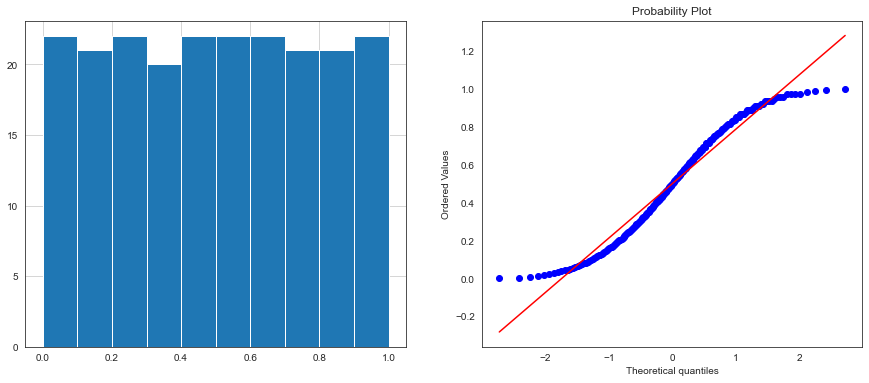

In [40]:
qtrans = QuantileTransformer()
df1['CO2_q_trans_uniform'] = qtrans.fit_transform(df1[['CO2']])

print('Mean:', df1['CO2_q_trans_uniform'].mean())
print('Standard Deviation:', df1['CO2_q_trans_uniform'].std())

diagnostic_plots(df1,'CO2_q_trans_uniform')

Mean: 0.0018711935620056976
Standard Deviation: 1.0997777273515295


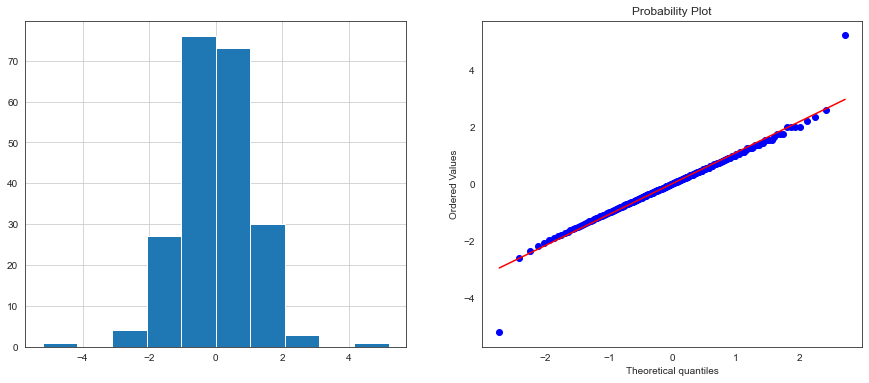

In [41]:
qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
df1['CO2_q_trans_normal'] = qtrans.fit_transform(df1[['CO2']])

print('Mean:', df1['CO2_q_trans_normal'].mean())
print('Standard Deviation:', df1['CO2_q_trans_normal'].std())

diagnostic_plots(df1,'CO2_q_trans_normal')

In [42]:
df1

,CO2,CO2_scaled,CO2_min_max_scaled,CO2_q_trans_uniform,CO2_q_trans_normal
Year,,,,,
1800-01-01,0.00568,-1.035198,0.000216,0.210280,-0.805449
1801-01-01,0.00561,-1.035208,0.000212,0.205607,-0.821757
1802-01-01,0.00555,-1.035218,0.000209,0.200935,-0.838288
1803-01-01,0.00548,-1.035228,0.000205,0.196262,-0.855050
1804-01-01,0.00542,-1.035238,0.000202,0.191589,-0.872056
...,...,...,...,...,...
2010-01-01,15.60000,1.361255,0.857129,0.831776,0.961206
2011-01-01,15.60000,1.361255,0.857129,0.831776,0.961206
2012-01-01,14.80000,1.238316,0.813169,0.799065,0.838288


In [43]:
df2=df1.drop(["CO2_scaled","CO2_min_max_scaled","CO2_q_trans_uniform","CO2_q_trans_normal"],axis=1)
df2

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542
...,...
2010-01-01,15.60000
2011-01-01,15.60000
2012-01-01,14.80000


In [44]:
df2.to_csv("co2_data")

In [45]:
df2.describe()

,CO2
count,215.000000
mean,6.741970
std,6.522437
min,0.001750
25%,0.041050
50%,6.390000
75%,11.500000
max,18.200000


In [46]:
# Test for Stationarity (Dickey Fuller Test) :
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller 


def TestStationaryAdfuller(df2, cutoff = 0.01):
    df2_test =adfuller(df2, autolag = 'AIC')
    df2_test_output = pd.Series(df2_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df2_test[4].items():
        df2_test_output['Critical Value (%s)'%key] = value
    print(df2_test_output)
    
    if df2_test[1] <= cutoff:
        print("Failed to reject null hypothesis. Data is stationary")
    else:
        print("Failed to accept null hypothesis. Data is non-stationary ")

In [47]:
TestStationaryAdfuller(df2)

Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64
Failed to accept null hypothesis. Data is non-stationary 


In [48]:
#Define Stationary Plot

def TestStationaryPlot(df2):
    rol_mean = df2.rolling(window = 20, center = False).mean()
    rol_std = df2.rolling(window = 20, center = False).std()
    
    plt.plot(df2, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 10)
    plt.ylabel('Total Emissions', fontsize = 10)
    plt.legend(loc='best', fontsize = 10)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 10)
    plt.show(block= True)

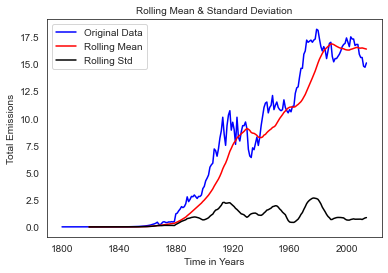

In [49]:
TestStationaryPlot(df2)

In [50]:
#Above Data is non-stationary so we will use differencing
# Differencing :

df_first_difference = df2 - df2.shift(1)

df_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [51]:
# test dickey fuller test on differenced data
# dataframe df_first_difference

TestStationaryAdfuller(df_first_difference.dropna(inplace=False))

Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Failed to reject null hypothesis. Data is stationary


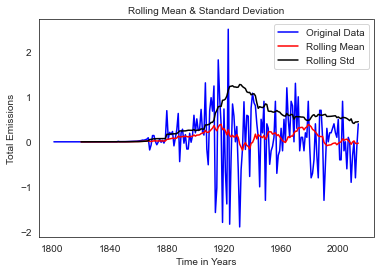

In [52]:
#Stationary Plot for first_difference data

TestStationaryPlot(df_first_difference)

In [53]:
# moving average of data first 6 order 
moving_avg = df2.rolling(6).mean()
moving_avg_diff = df2 - moving_avg
moving_avg_diff.head(10)

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,NaN
1803-01-01,NaN
1804-01-01,NaN
1805-01-01,-0.000157
1806-01-01,-0.000162
1807-01-01,-0.000158
1808-01-01,-0.000155


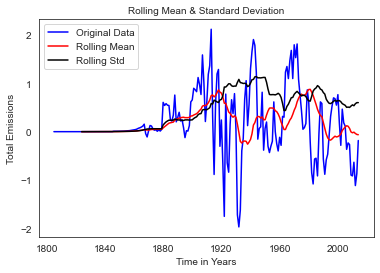

In [54]:
# stationary plot for data first 6 order 
moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(moving_avg_diff)

In [55]:
#The first difference improves the stationarity of the series significantly. 
#Let us use the seasonal first order difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [56]:
#Seasonal First order differencing

df_CO2_seasonal_first_difference = df_first_difference - df_first_difference.shift(12)  

In [57]:
df_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,NaN
1803-01-01,NaN
1804-01-01,NaN


In [58]:
## Again test dickey fuller test on data_CO2_seasonal_first_difference

TestStationaryAdfuller(df_CO2_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -6.831718e+00
p-value                        1.886305e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.870000e+02
Critical Value (1%)           -3.465812e+00
Critical Value (5%)           -2.877123e+00
Critical Value (10%)          -2.575077e+00
dtype: float64
Failed to reject null hypothesis. Data is stationary


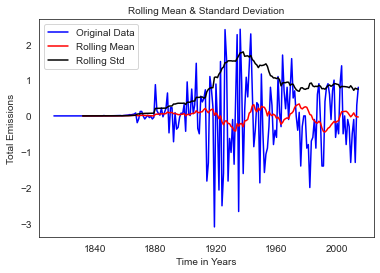

In [59]:
#Stationary Plot for seasonal_first_difference

TestStationaryPlot(df_CO2_seasonal_first_difference)

In [60]:
#We are considering this seasonal first difference for further analysis because it looks more stationary

# Time Series Decomposition Plot :

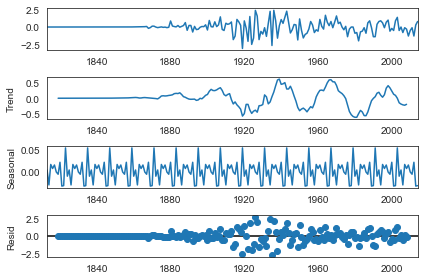

In [61]:
#Time Series Decomposition Plot for df_CO2_seasonal_first_difference
from statsmodels.tsa.seasonal import seasonal_decompose
ts_decomposition = seasonal_decompose(df_CO2_seasonal_first_difference.dropna(),period=12)
ts_decomposition.plot()
plt.show()

# ACF Plot and PACF Plot :
#ACF and PACF plot

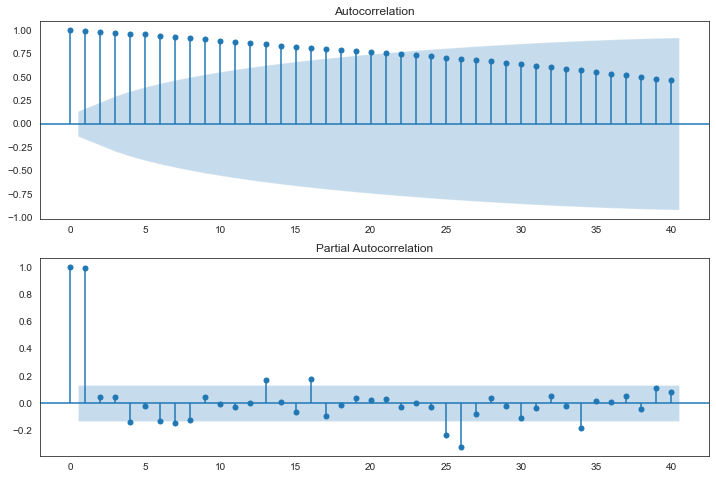

In [62]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['CO2'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['CO2'],lags=40,ax=ax2)

# Model Building

# Non-stationary data:

In [63]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
#Splitting the data
Train = df2.head(172)
Test = df2.tail(43)

In [65]:
Train.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [66]:
Test.head()

,CO2
Year,
1972-01-01,17.2
1973-01-01,17.0
1974-01-01,17.1
1975-01-01,17.2
1976-01-01,17.0


In [67]:
def RMSE_Value(forecast, actual):

    rmse_val = np.mean((forecast - actual)**2)**.5  
    return(rmse_val)

In [68]:
def MAPE_Value(forecast, actual):
    mape_val = np.mean(np.abs(forecast - actual)/np.abs(actual)) 
    
    return(mape_val)

# Simple Exponential Method

In [69]:
Train["CO2"] = Train["CO2"].astype('double') 
ses_model = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
#MAPE value
MAPE_ses_model=MAPE_Value(pred_ses,Test.CO2) 
print("MAPE_ses_model:",MAPE_ses_model)

#RMSE Value 
rmse_ses_model = RMSE_Value(pred_ses,Test.CO2)
print("rmse_ses_model:",rmse_ses_model)

MAPE_ses_model: 0.04894100234906147
rmse_ses_model: 0.9375723879738409


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



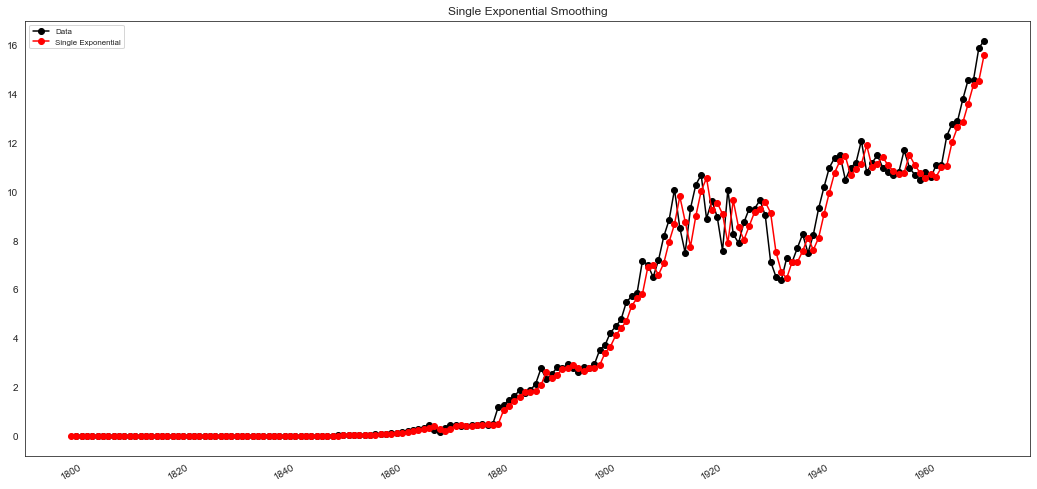

In [70]:
# Exponential Smoothing-Single:

data_SE = df1[1:172]["CO2"]
plot1 = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8, optimized=False)
plt.figure(figsize=(18,8))
plt.plot(data_SE, marker="o", color="black", label='Data') 
plt.xticks(rotation=30)
plt.plot(plot1.fittedvalues, marker="o", color="red",label='Single Exponential')
plt.title('Single Exponential Smoothing')
plt.legend(loc='upper left', fontsize=8)

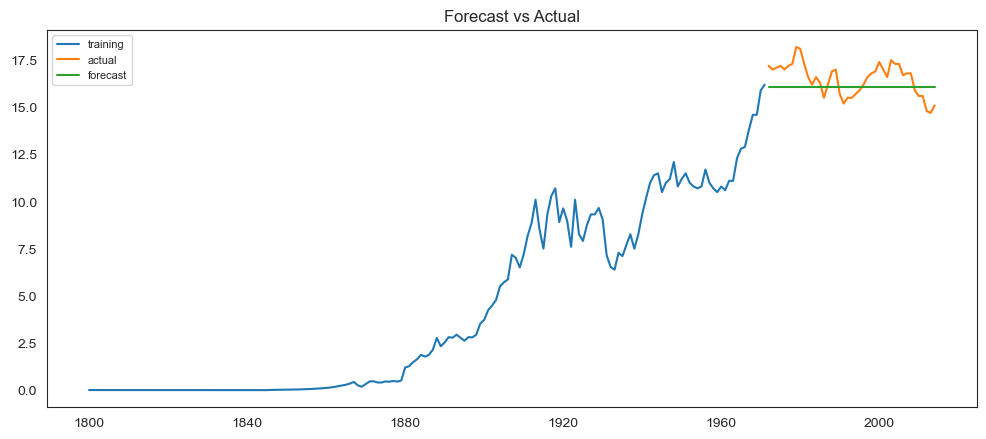

In [71]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_ses, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Holt method

In [72]:
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
#MAPE value
MAPE_hw_model= MAPE_Value(pred_hw,Test.CO2) 
print("MAPE_hw_model:",MAPE_hw_model)

#RMSE Value 
rmse_hw_model = RMSE_Value(pred_hw,Test.CO2)
print("rmse_hw_model:",rmse_hw_model)

MAPE_hw_model: 0.7049642569325844
rmse_hw_model: 13.375195943865716


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



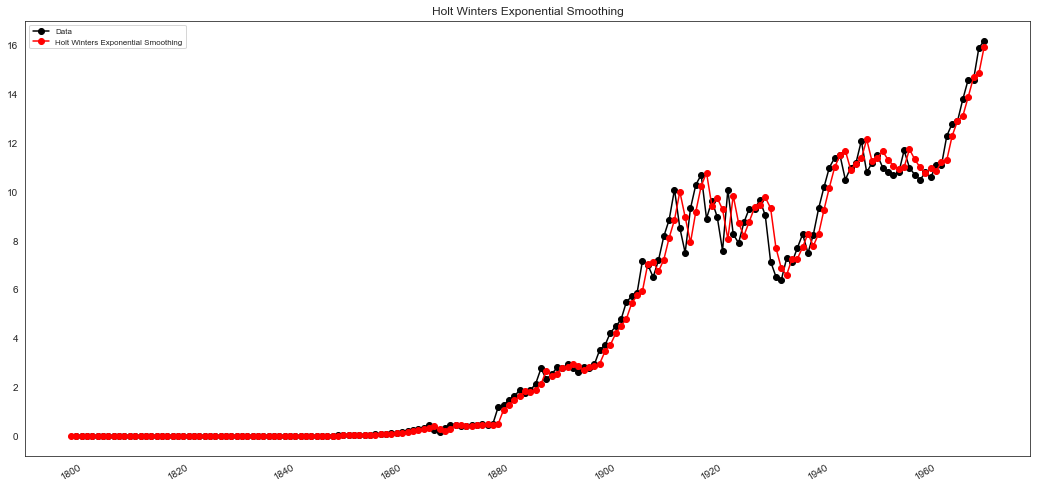

In [73]:
plot2 = Holt(Train["CO2"], exponential=True).fit(smoothing_level=0.8)
plt.figure(figsize=(18,8))
plt.plot(data_SE, marker="o", color="black", label='Data') 
plt.xticks(rotation=30)
plt.plot(plot2.fittedvalues, marker="o", color="red",label = "Holt Winters Exponential Smoothing")
plt.title('Holt Winters Exponential Smoothing')
plt.legend(loc='upper left', fontsize=8)

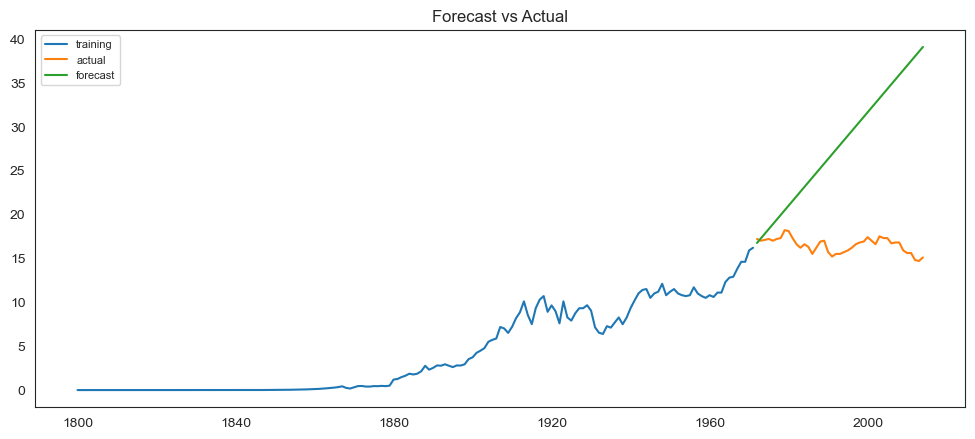

In [74]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hw, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Holts winter exponential smoothing with additive seasonality and additive trend

In [75]:
hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
#mape value
MAPE_hwe_add_add_model=MAPE_Value(pred_hwe_add_add,Test.CO2)  
print("MAPE_hwe_add_add_model:",MAPE_hwe_add_add_model)

#RMSE value
rmse_hwe_add_add_model = RMSE_Value(pred_hwe_add_add,Test.CO2)
print("rmse_hwe_add_add_model:",rmse_hwe_add_add_model)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



MAPE_hwe_add_add_model: 0.1274880885654194
rmse_hwe_add_add_model: 2.457410896510638


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



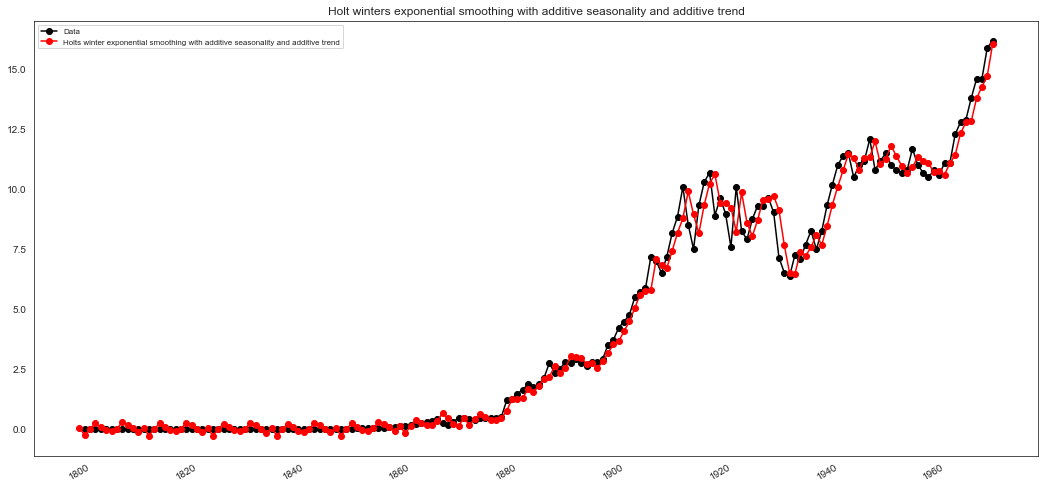

In [76]:
#Plot
plot3 = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)
plt.figure(figsize=(18,8))
plt.plot(data_SE, marker="o", color="black",label="Data")
plt.xticks(rotation=30)
plt.plot(plot3.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")
plt.title('Holt winters exponential smoothing with additive seasonality and additive trend')
plt.legend(loc='upper left', fontsize=8)

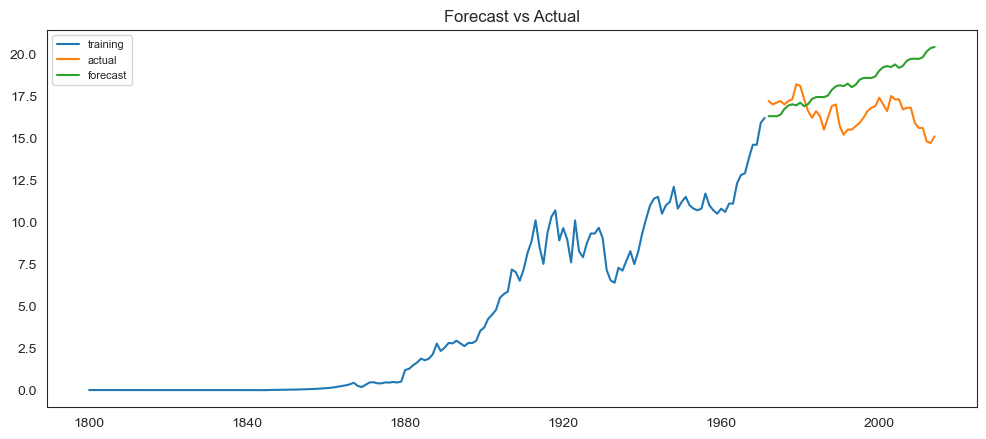

In [77]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_add_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [78]:
#MAPE value
hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
#MAPE Value
MAPE_hwe_model_mul_add_model=MAPE_Value(pred_hwe_mul_add,Test.CO2)  
print("MAPE_hwe_model_mul_add_model:",MAPE_hwe_model_mul_add_model)

#RMSE value
rmse_hwe_model_mul_add_model = RMSE_Value(pred_hwe_mul_add,Test.CO2)
print("rmse_hwe_model_mul_add_model:",rmse_hwe_model_mul_add_model)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



MAPE_hwe_model_mul_add_model: 6.409096285900987
rmse_hwe_model_mul_add_model: 137.06515167842966


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



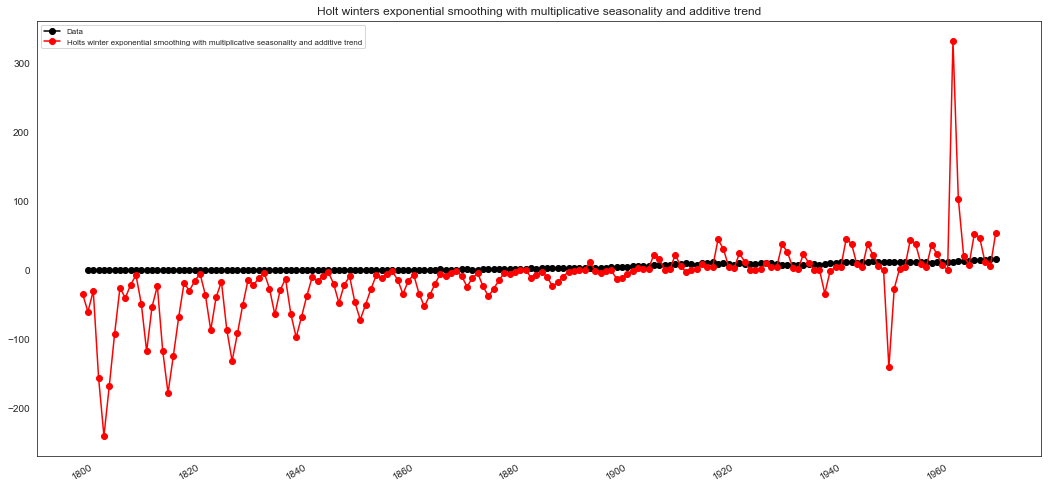

In [79]:
#Plot
plot4 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)
plt.figure(figsize=(18,8))
plt.plot(data_SE, marker="o", color="black",label="Data")
plt.xticks(rotation=30)
plt.plot(plot4.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")
plt.title('Holt winters exponential smoothing with multiplicative seasonality and additive trend')
plt.legend(loc='upper left', fontsize=8)

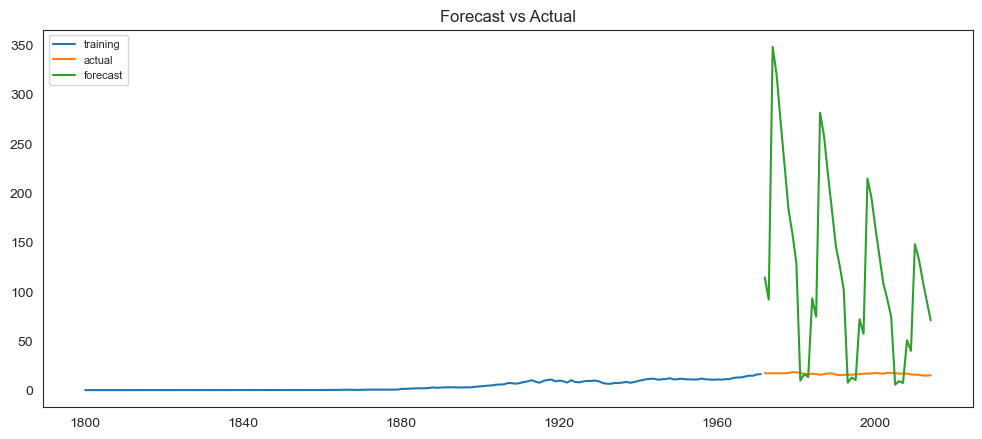

In [80]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_add, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [81]:
hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_mul = hwe_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
#MAPE Value
MAPE_hwe_model_mul_mul_model=MAPE_Value(pred_hwe_mul_mul,Test.CO2) 
print("MAPE_hwe_model_mul_mul_model:",MAPE_hwe_model_mul_mul_model)

#RMSE value
rmse_hwe_model_mul_mul_model = RMSE_Value(pred_hwe_mul_mul,Test.CO2)
print("rmse_hwe_model_mul_mul_model:",rmse_hwe_model_mul_mul_model)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



MAPE_hwe_model_mul_mul_model: 0.40548659514339896
rmse_hwe_model_mul_mul_model: 8.033257687214135


C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



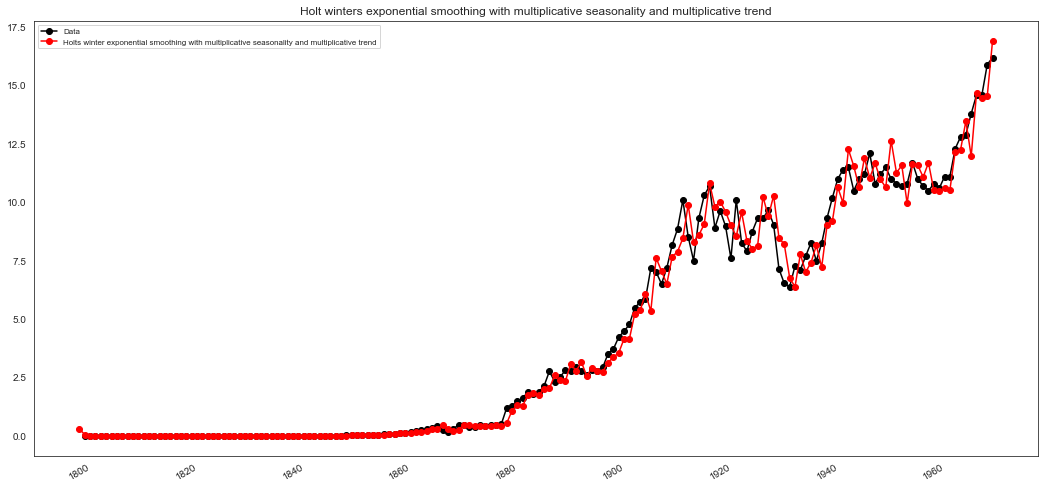

In [82]:
#Plot
plot5 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)
plt.figure(figsize=(18,8))
plt.plot(data_SE, marker="o",  color="black",label="Data")
plt.xticks(rotation=30)
plt.plot(plot5.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")
plt.title('Holt winters exponential smoothing with multiplicative seasonality and multiplicative trend')
plt.legend(loc='upper left', fontsize=8)

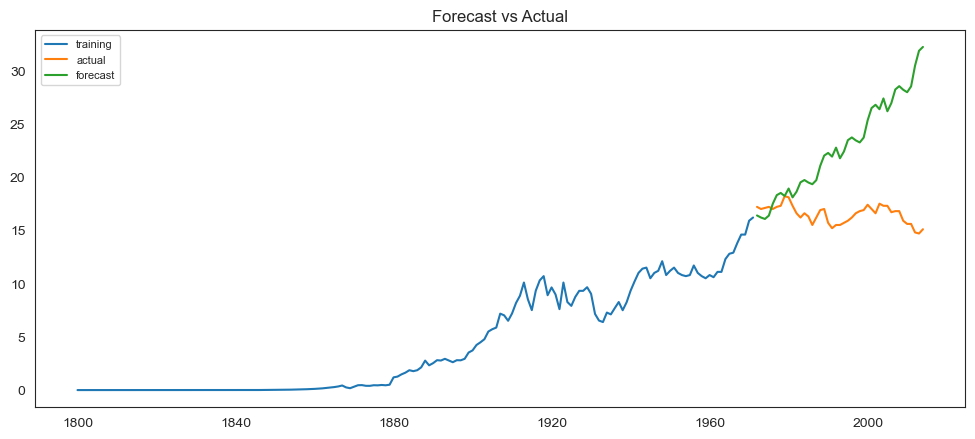

In [83]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train["CO2"], label='training')
plt.plot(Test["CO2"], label='actual')
plt.plot(pred_hwe_mul_mul, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Model Based Forecasting 
Linear , Exponential and Quadratic Models of forecasting:

In [84]:
# Data preprocessing for models
data_model = df.copy()
data_model.head()

,Year,CO2,co2_boxcox,logCO2,sqr_co2,Rec_co2,Exp_co2
0,1800-01-01,0.00568,-3.094412,-5.170804,0.075366,176.056338,1.005696
1,1801-01-01,0.00561,-3.098401,-5.183205,0.074900,178.253119,1.005626
2,1802-01-01,0.00555,-3.101852,-5.193957,0.074498,180.180180,1.005565
3,1803-01-01,0.00548,-3.105915,-5.206650,0.074027,182.481752,1.005495
4,1804-01-01,0.00542,-3.109430,-5.217659,0.073621,184.501845,1.005435


In [85]:
data_model["t"] = np.arange(1,216)
data_model["t_squared"]=data_model["t"]*data_model["t"]
data_model["lg_CO2"]= np.log(data_model["CO2"])
data_model.head()

,Year,CO2,co2_boxcox,logCO2,sqr_co2,Rec_co2,Exp_co2,t,t_squared,lg_CO2
0,1800-01-01,0.00568,-3.094412,-5.170804,0.075366,176.056338,1.005696,1,1,-5.170804
1,1801-01-01,0.00561,-3.098401,-5.183205,0.074900,178.253119,1.005626,2,4,-5.183205
2,1802-01-01,0.00555,-3.101852,-5.193957,0.074498,180.180180,1.005565,3,9,-5.193957
3,1803-01-01,0.00548,-3.105915,-5.206650,0.074027,182.481752,1.005495,4,16,-5.206650
4,1804-01-01,0.00542,-3.109430,-5.217659,0.073621,184.501845,1.005435,5,25,-5.217659


In [86]:
#Splitting data into Train and Test
Train_m = data_model.head(172)
Test_m = data_model.tail(43)

In [87]:
Train_m.head()

,Year,CO2,co2_boxcox,logCO2,sqr_co2,Rec_co2,Exp_co2,t,t_squared,lg_CO2
0,1800-01-01,0.00568,-3.094412,-5.170804,0.075366,176.056338,1.005696,1,1,-5.170804
1,1801-01-01,0.00561,-3.098401,-5.183205,0.074900,178.253119,1.005626,2,4,-5.183205
2,1802-01-01,0.00555,-3.101852,-5.193957,0.074498,180.180180,1.005565,3,9,-5.193957
3,1803-01-01,0.00548,-3.105915,-5.206650,0.074027,182.481752,1.005495,4,16,-5.206650
4,1804-01-01,0.00542,-3.109430,-5.217659,0.073621,184.501845,1.005435,5,25,-5.217659


In [88]:
Test_m.head()

,Year,CO2,co2_boxcox,logCO2,sqr_co2,Rec_co2,Exp_co2,t,t_squared,lg_CO2
172,1972-01-01,17.2,3.948138,2.844909,4.147288,0.058140,2.950293e+07,173,29929,2.844909
173,1973-01-01,17.0,3.926355,2.833213,4.123106,0.058824,2.415495e+07,174,30276,2.833213
174,1974-01-01,17.1,3.937272,2.839078,4.135215,0.058480,2.669535e+07,175,30625,2.839078
175,1975-01-01,17.2,3.948138,2.844909,4.147288,0.058140,2.950293e+07,176,30976,2.844909
176,1976-01-01,17.0,3.926355,2.833213,4.123106,0.058824,2.415495e+07,177,31329,2.833213


# Linear Model

In [89]:
import statsmodels.formula.api as smf 
linear_model = smf.ols('CO2~t',data=Train_m).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test_m['t'])))
#RMSE value
rmse_linear_model = RMSE_Value(pred_linear,Test_m['CO2'])
print("rmse_linear_model:",rmse_linear_model)

#MAPE value
MAPE_linear_model = MAPE_Value(pred_linear,Test_m['CO2'])
print("MAPE_linear_model:",MAPE_linear_model)
print("**********************************************************************************************************************")
linear_model.summary()

rmse_linear_model: 3.1445157061117723
MAPE_linear_model: 0.16483919760009177
**********************************************************************************************************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     944.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.54e-71
Time:                        17:07:18   Log-Likelihood:                -351.72
No. Observations:                 172   AIC:                             707.4
Df Residuals:                     170   BIC:                             713.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3801      0.288    -11.732      0.000      -3.949      -2.811
t              0.0888      0.003     30.734      0.000       0.083       0.094
==============================================================================
Omnibus:                       38.221   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.438
Skew:                           0.105   Prob(JB):                       0.0147
Kurtosis:                       1.936   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

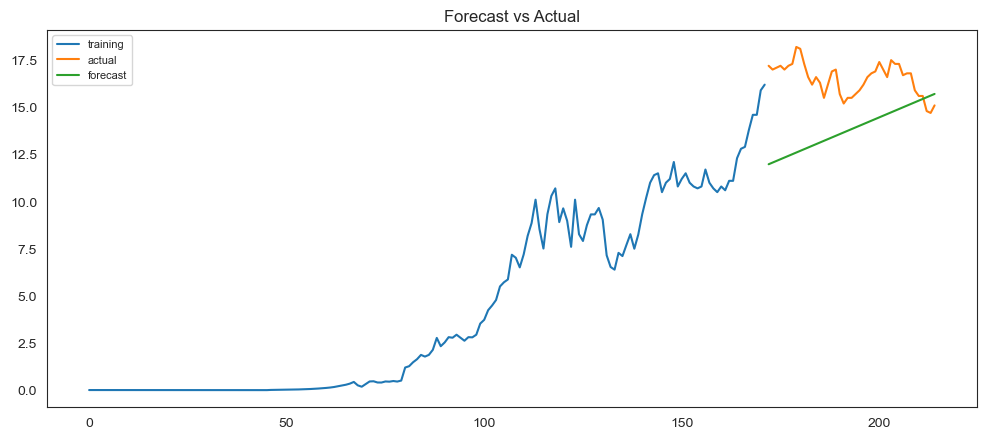

In [90]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_linear, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Quadratic Model

In [91]:
Exp = smf.ols('lg_CO2~t',data=Train_m).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_m['t'])))

#RMSE value
rmse_Exp_model = RMSE_Value(np.exp(pred_Exp),Test_m['CO2'])
print("rmse_Exp_model:",rmse_Exp_model)

#MAPE Value
MAPE_Exp_model = MAPE_Value(np.exp(pred_Exp),Test_m['CO2'])
print("MAPE_Exp_model:",MAPE_Exp_model)
print("*****************************************************************************************************************")
Exp.summary()

rmse_Exp_model: 550.3307096054023
MAPE_Exp_model: 27.07095853811735
*****************************************************************************************************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lg_CO2   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           6.73e-79
Time:                        17:07:18   Log-Likelihood:                -271.13
No. Observations:                 172   AIC:                             546.3
Df Residuals:                     170   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3091      0.180    -34.988      0.000      -6.665      -5.953
t              0.0626      0.002     34.616      0.000       0.059       0.066
==============================================================================
Omnibus:                       14.863   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.019
Skew:                          -0.460   Prob(JB):                      0.00668
Kurtosis:                       2.257   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

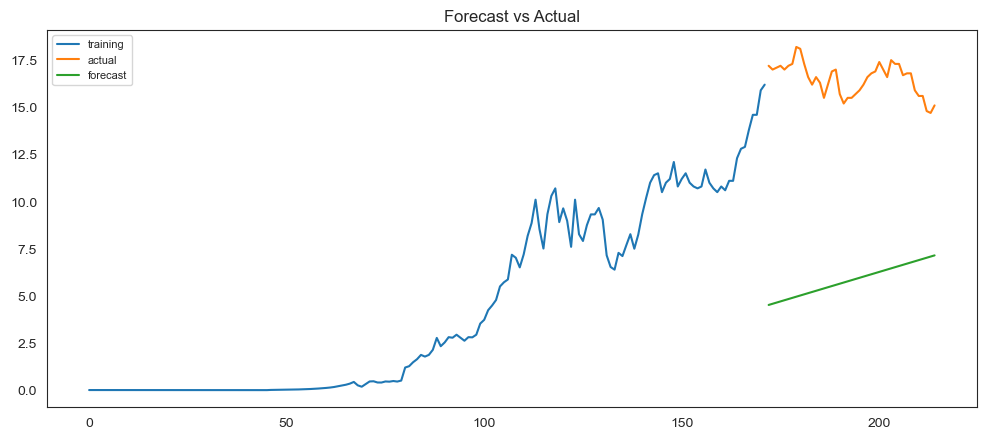

In [92]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Exp, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [93]:
Quad = smf.ols('CO2~t+t_squared',data=Train_m).fit()
pred_Quad = pd.Series(Quad.predict(Test_m[["t","t_squared"]]))

#RMSE VALUE
rmse_Quad_model = RMSE_Value(pred_Quad,Test_m['CO2'])
print("rmse_Quad_model:",rmse_Quad_model)

#MAPE Value
MAPE_Quad_model = MAPE_Value(pred_Quad,Test_m['CO2'])
print("MAPE_Quad_model:",MAPE_Quad_model)
print("**********************************************************************************************************************")
Quad.summary()

rmse_Quad_model: 4.495138217852161
MAPE_Quad_model: 0.23150157996232634
**********************************************************************************************************************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1128.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           1.78e-98
Time:                        17:07:19   Log-Likelihood:                -284.37
No. Observations:                 172   AIC:                             574.7
Df Residuals:                     169   BIC:                             584.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2444      0.295     -0.828      0.409      -0.827       0.338
t             -0.0193      0.008     -2.456      0.015      -0.035      -0.004
t_squared      0.0006   4.41e-05     14.172      0.000       0.001       0.001
==============================================================================
Omnibus:                       33.246   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.854
Skew:                           1.048   Prob(JB):                     1.49e-11
Kurtosis:                       4.601   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

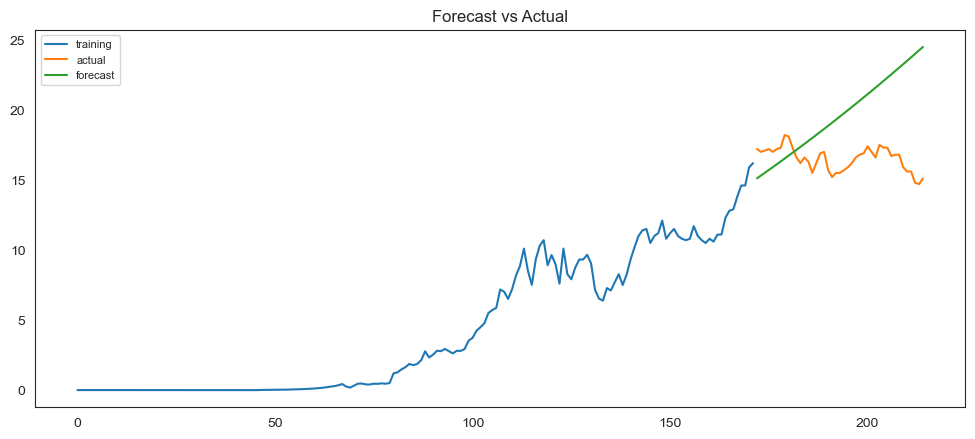

In [94]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train_m["CO2"], label='training')
plt.plot(Test_m["CO2"], label='actual')
plt.plot(pred_Quad, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# ARIMA MODEL NON STATIONARY DATA

In [95]:
df2.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [96]:
#splitting the data
train_a = df2[:-43]
test_a = df2[-43:]

In [97]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [98]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(train, test, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [99]:
# # evaluate parameters
# p_values = range(0, 5)
# d_values = range(0, 3)
# q_values = range(0, 5)
# warnings.filterwarnings("ignore")
# evaluate_models(train_a.values, test_a.values, p_values, d_values, q_values)

In [100]:
#order(3,1,4)
model_arima_a = ARIMA(train_a['CO2'],order = (3,1,4))
model_arima_a = model_arima_a.fit()
model_arima_a.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  172
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -138.277
Date:                Mon, 22 Aug 2022   AIC                            292.555
Time:                        17:07:20   BIC                            317.688
Sample:                    01-01-1800   HQIC                           302.753
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8374      0.378      2.213      0.027       0.096       1.579
ar.L2          0.1332      0.474      0.281      0.779      -0.795       1.062
ar.L3         -0.4672      0.235     -1.984      0.047      -0.929      -0.006
ma.L1         -0.9088      0.390     -2.330      0.020      -1.673      -0.144
ma.L2         -0.2043      0.486     -0.421      0.674      -1.156       0.747
ma.L3          0.7178      0.200      3.593      0.000       0.326       1.109
ma.L4         -0.0632      0.115     -0.549      0.583      -0.289       0.163
sigma2         0.2939      0.023     12.655      0.000       0.248       0.339
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                87.88
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):           76885.99   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
### prediction on test set
start = len(train_a)
end = len(train_a)+len(test_a)-1
pred_arima_a = model_arima_a.predict(start=start,end=end)
print(pred_arima_a)

1972-01-01    16.180616
1973-01-01    16.411131
1974-01-01    16.466077
1975-01-01    16.545012
1976-01-01    16.510732
1977-01-01    16.466871
1978-01-01    16.388694
1979-01-01    16.333399
1980-01-01    16.297170
1981-01-01    16.295990
1982-01-01    16.316009
1983-01-01    16.349543
1984-01-01    16.380844
1985-01-01    16.402171
1986-01-01    16.408533
1987-01-01    16.402078
1988-01-01    16.387556
1989-01-01    16.371562
1990-01-01    16.359250
1991-01-01    16.353593
1992-01-01    16.354688
1993-01-01    16.360604
1994-01-01    16.368347
1995-01-01    16.375108
1996-01-01    16.379037
1997-01-01    16.379610
1998-01-01    16.377456
1999-01-01    16.373892
2000-01-01    16.370352
2001-01-01    16.367920
2002-01-01    16.367076
2003-01-01    16.367700
2004-01-01    16.369246
2005-01-01    16.371018
2006-01-01    16.372417
2007-01-01    16.373101
2008-01-01    16.373033
2009-01-01    16.372414
2010-01-01    16.371567
2011-01-01    16.370806
2012-01-01    16.370346
2013-01-01    16

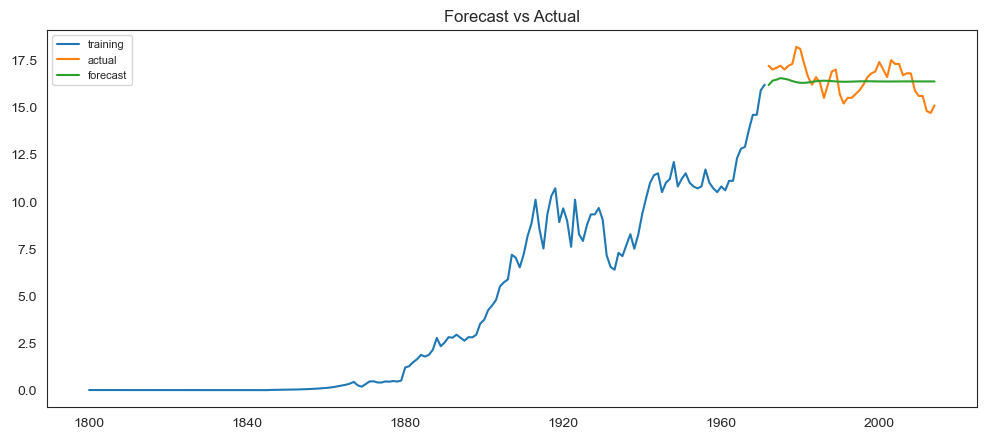

In [102]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_a["CO2"], label='training')
plt.plot(test_a["CO2"], label='actual')
plt.plot(pred_arima_a, label='forecast')

plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
#RMSE Value
RMSE_ARIMA_a = RMSE_Value(pred_arima_a.values, test_a.values)
print("RMSE_ARIMA_a:",RMSE_ARIMA_a)

#MAPE Value
MAPE_ARIMA_a = MAPE_Value(pred_arima_a.values, test_a.values)
print("MAPE_ARIMA_a:",MAPE_ARIMA_a)

RMSE_ARIMA_a: 0.8483254211360652
MAPE_ARIMA_a: 0.044453549322725563


# Stationary Data:

# Model - ARIMA(Stationary Data) :

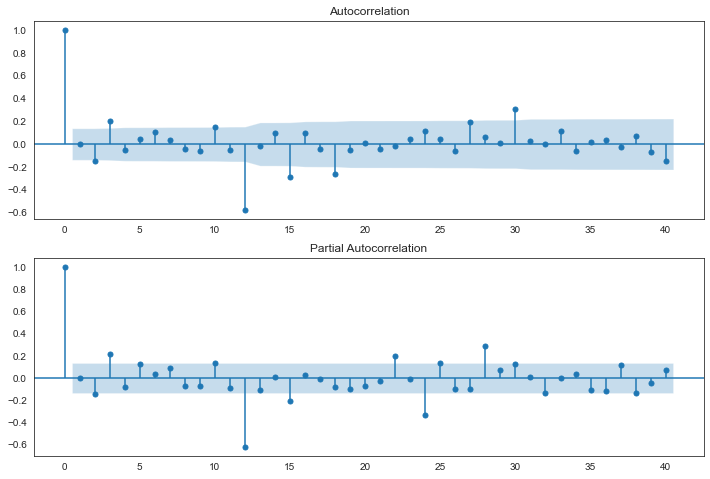

In [104]:
#ACF and PACF plots:
#Stationary Data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CO2_seasonal_first_difference.dropna(inplace=False), lags=40, ax=ax2)

In [105]:
df_CO2_seasonal_first_difference.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,NaN
1802-01-01,NaN
1803-01-01,NaN
1804-01-01,NaN


In [106]:
X= df_CO2_seasonal_first_difference.dropna(inplace=False)
X.head()

,CO2
Year,
1813-01-01,0.00000
1814-01-01,-0.00002
1815-01-01,-0.00002
1816-01-01,-0.00003
1817-01-01,-0.00004


In [107]:
train = X.iloc[:-43]
test = X.iloc[-43:]

In [108]:
# p_values = range(0, 5)
# d_values = range(0, 3)
# q_values = range(0, 5)
# warnings.filterwarnings("ignore")
# evaluate_models(train.values, test.values, p_values, d_values, q_values)

In [109]:
#order(0,2,3)
model_arima = ARIMA(train['CO2'],order = (0,2,3))
model_arima = model_arima.fit()
model_arima.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  159
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -201.393
Date:                Mon, 22 Aug 2022   AIC                            410.785
Time:                        17:07:22   BIC                            423.010
Sample:                    01-01-1813   HQIC                           415.750
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.1039      4.743     -0.444      0.657     -11.400       7.192
ma.L2          1.2149      5.248      0.232      0.817      -9.070      11.500
ma.L3         -0.1109      0.541     -0.205      0.838      -1.172       0.950
sigma2         0.6837      3.251      0.210      0.833      -5.688       7.055
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):           19986.82   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
### prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_arima = model_arima.predict(start=start,end=end)
print(pred_arima)

1972-01-01    0.036692
1973-01-01    0.101833
1974-01-01    0.102701
1975-01-01    0.103570
1976-01-01    0.104438
1977-01-01    0.105307
1978-01-01    0.106175
1979-01-01    0.107044
1980-01-01    0.107912
1981-01-01    0.108781
1982-01-01    0.109649
1983-01-01    0.110518
1984-01-01    0.111386
1985-01-01    0.112255
1986-01-01    0.113123
1987-01-01    0.113992
1988-01-01    0.114860
1989-01-01    0.115729
1990-01-01    0.116597
1991-01-01    0.117466
1992-01-01    0.118334
1993-01-01    0.119203
1994-01-01    0.120071
1995-01-01    0.120940
1996-01-01    0.121808
1997-01-01    0.122677
1998-01-01    0.123545
1999-01-01    0.124414
2000-01-01    0.125282
2001-01-01    0.126151
2002-01-01    0.127019
2003-01-01    0.127888
2004-01-01    0.128756
2005-01-01    0.129625
2006-01-01    0.130493
2007-01-01    0.131362
2008-01-01    0.132230
2009-01-01    0.133099
2010-01-01    0.133967
2011-01-01    0.134835
2012-01-01    0.135704
2013-01-01    0.136572
2014-01-01    0.137441
Freq: AS-JA

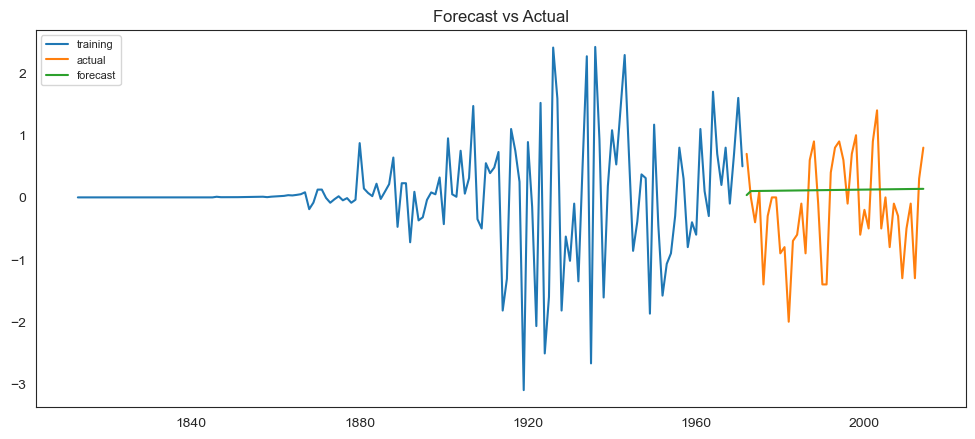

In [111]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_arima, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [112]:
#RMSE value
RMSE_ARIMA = RMSE_Value(pred_arima.values,test.values)
print("RMSE_ARIMA:",RMSE_ARIMA)
#MAPE Value
MAPE_ARIMA = MAPE_Value(pred_arima.values, test.values)
print("MAPE_ARIMA:",MAPE_ARIMA)

RMSE_ARIMA: 0.8280284723462648
MAPE_ARIMA: inf


# Auto Regressor (AR) model

In [113]:
model_ar = AutoReg(train,lags = 6).fit()
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CO2   No. Observations:                  159
Model:                     AutoReg(6)   Log Likelihood                -180.339
Method:               Conditional MLE   S.D. of innovations              0.786
Date:                Mon, 22 Aug 2022   AIC                             -0.376
Time:                        17:07:23   BIC                             -0.217
Sample:                    01-01-1819   HQIC                            -0.312
                         - 01-01-1971                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0375      0.064      0.588      0.556      -0.087       0.162
CO2.L1        -0.0394      0.081     -0.487      0.626      -0.198       0.119
CO2.L2        -0.2198      0.081     -2.704      0.0

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



In [114]:
pred_ar = model_ar.predict(start=start,end=end,dynamic = False)
print(pred_ar)

1972-01-01   -0.047015
1973-01-01    0.319832
1974-01-01    0.159342
1975-01-01    0.171611
1976-01-01    0.241285
1977-01-01    0.039510
1978-01-01    0.053642
1979-01-01    0.117165
1980-01-01    0.050749
1981-01-01    0.062165
1982-01-01    0.070071
1983-01-01    0.036901
1984-01-01    0.051345
1985-01-01    0.055176
1986-01-01    0.040620
1987-01-01    0.047173
1988-01-01    0.046678
1989-01-01    0.041236
1990-01-01    0.045261
1991-01-01    0.044278
1992-01-01    0.042029
1993-01-01    0.043928
1994-01-01    0.043200
1995-01-01    0.042471
1996-01-01    0.043364
1997-01-01    0.042875
1998-01-01    0.042651
1999-01-01    0.043049
2000-01-01    0.042783
2001-01-01    0.042741
2002-01-01    0.042904
2003-01-01    0.042763
2004-01-01    0.042771
2005-01-01    0.042836
2006-01-01    0.042767
2007-01-01    0.042782
2008-01-01    0.042805
2009-01-01    0.042773
2010-01-01    0.042785
2011-01-01    0.042791
2012-01-01    0.042777
2013-01-01    0.042784
2014-01-01    0.042786
Freq: AS-JA

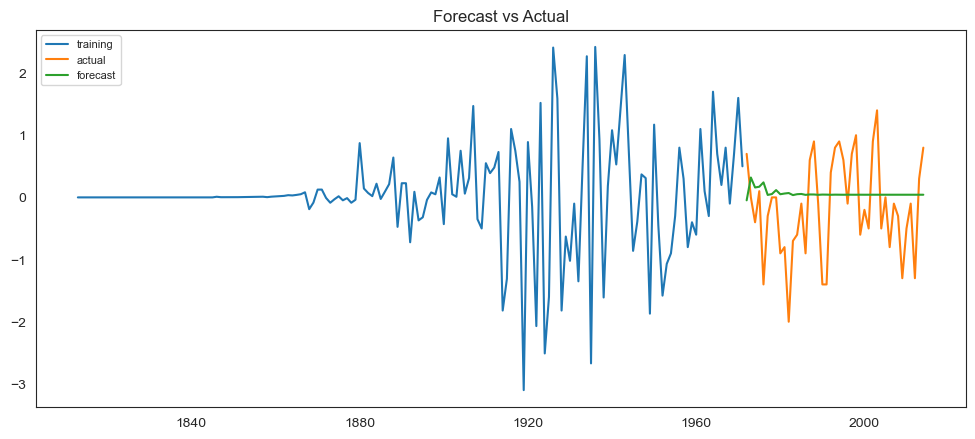

In [115]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ar, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [116]:
RMSE_AR = RMSE_Value(pred_ar.values,test.values)
print("RMSE_AR",RMSE_AR)
#MAPE Value
MAPE_AR = MAPE_Value(pred_ar.values, test.values)
print("MAPE_AR:",MAPE_AR)

RMSE_AR 0.8122559266775675
MAPE_AR: inf


# Moving Average (MA) model

In [117]:
model_ma = ARIMA(train['CO2'],order = (0,1,3))
model_ma = model_ma.fit()
pred_ma = model_ma.predict(start=start,end=end)
print(pred_ma)
model_ma.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



1972-01-01    0.470339
1973-01-01    0.817627
1974-01-01    0.753426
1975-01-01    0.753426
1976-01-01    0.753426
1977-01-01    0.753426
1978-01-01    0.753426
1979-01-01    0.753426
1980-01-01    0.753426
1981-01-01    0.753426
1982-01-01    0.753426
1983-01-01    0.753426
1984-01-01    0.753426
1985-01-01    0.753426
1986-01-01    0.753426
1987-01-01    0.753426
1988-01-01    0.753426
1989-01-01    0.753426
1990-01-01    0.753426
1991-01-01    0.753426
1992-01-01    0.753426
1993-01-01    0.753426
1994-01-01    0.753426
1995-01-01    0.753426
1996-01-01    0.753426
1997-01-01    0.753426
1998-01-01    0.753426
1999-01-01    0.753426
2000-01-01    0.753426
2001-01-01    0.753426
2002-01-01    0.753426
2003-01-01    0.753426
2004-01-01    0.753426
2005-01-01    0.753426
2006-01-01    0.753426
2007-01-01    0.753426
2008-01-01    0.753426
2009-01-01    0.753426
2010-01-01    0.753426
2011-01-01    0.753426
2012-01-01    0.753426
2013-01-01    0.753426
2014-01-01    0.753426
Freq: AS-JA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  159
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -190.572
Date:                Mon, 22 Aug 2022   AIC                            389.143
Time:                        17:07:24   BIC                            401.393
Sample:                    01-01-1813   HQIC                           394.118
                         - 01-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9227      0.052    -17.611      0.000      -1.025      -0.820
ma.L2         -0.2724      0.074     -3.695      0.000      -0.417      -0.128
ma.L3          0.5155      0.046     11.103      0.000       0.425       0.607
sigma2         0.6440      0.043     15.049      0.000       0.560       0.728
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):               108.16
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):           33379.14   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

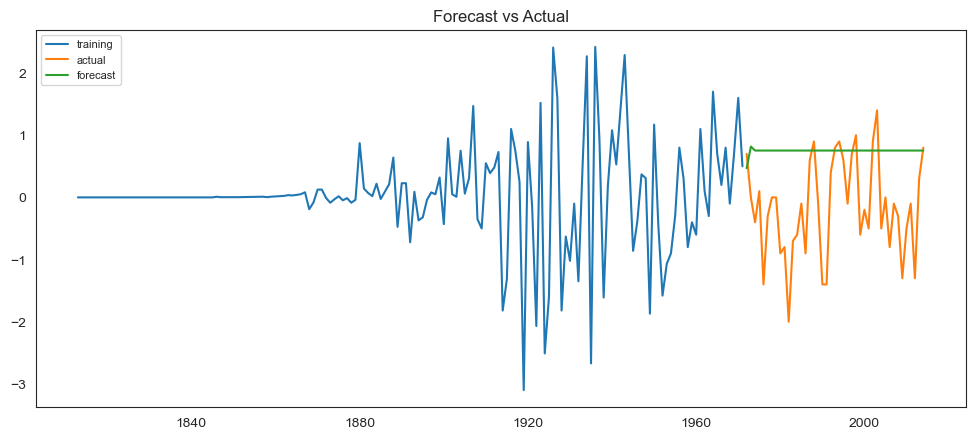

In [118]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_ma, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [119]:
#RMSE Value
RMSE_MA = RMSE_Value(pred_ma.values,test.values)
print("RMSE_MA:",RMSE_MA)
#MAPE Value
MAPE_MA = MAPE_Value(pred_ma.values, test.values)
print("MAPE_MA:",MAPE_MA)

RMSE_MA: 1.2019311265786066
MAPE_MA: inf


# SARIMAX

In [120]:
#for order(0,2,3)
model_1=sm.tsa.statespace.SARIMAX(df2['CO2'],order=(0,2,3),seasonal_order=(0,2,3,12))
results_1=model_1.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



In [121]:
### prediction on test set
start = len(train)
end = len(train)+len(test)-1
pred_sarimax_1 = results_1.predict(start=start,end=end)
print(pred_sarimax_1)

1959-01-01    11.641332
1960-01-01    10.636384
1961-01-01    10.810579
1962-01-01    10.308000
1963-01-01    11.327921
1964-01-01    11.734362
1965-01-01    12.784219
1966-01-01    12.878413
1967-01-01    12.289802
1968-01-01    13.895657
1969-01-01    13.726100
1970-01-01    14.686185
1971-01-01    16.486668
1972-01-01    16.501452
1973-01-01    17.017860
1974-01-01    17.033398
1975-01-01    17.456614
1976-01-01    17.991284
1977-01-01    17.609447
1978-01-01    17.432062
1979-01-01    17.178027
1980-01-01    18.649996
1981-01-01    17.453295
1982-01-01    17.720521
1983-01-01    17.176572
1984-01-01    16.785723
1985-01-01    16.370976
1986-01-01    16.391070
1987-01-01    15.750385
1988-01-01    16.805646
1989-01-01    17.295852
1990-01-01    17.095189
1991-01-01    15.946577
1992-01-01    15.682808
1993-01-01    14.785016
1994-01-01    15.675016
1995-01-01    15.876813
1996-01-01    16.400294
1997-01-01    15.828696
1998-01-01    16.424378
1999-01-01    16.992945
2000-01-01    17

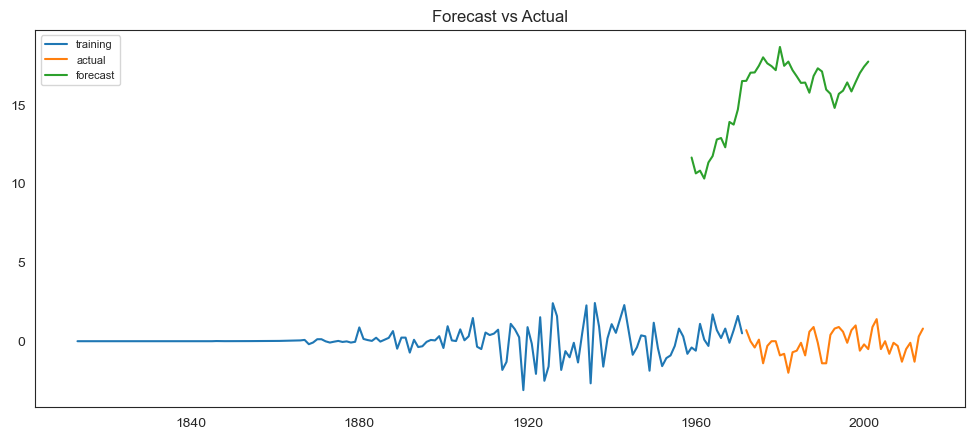

In [122]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train["CO2"], label='training')
plt.plot(test["CO2"], label='actual')
plt.plot(pred_sarimax_1, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [123]:
#RMSE Value
RMSE_SARIMAX_1 = RMSE_Value(pred_sarimax_1.values, test_a.values)
print("RMSE_SARIMAX_1:",RMSE_SARIMAX_1)

#MAPE Value
MAPE_SARIMAX_1 = MAPE_Value(pred_sarimax_1.values, test_a.values)
print("MAPE_SARIMAX_1:",MAPE_SARIMAX_1)

RMSE_SARIMAX_1: 2.6195088841904908
MAPE_SARIMAX_1: 0.11457617026480793


# SARIMAX

In [124]:
#for order(3,1,4)
model=sm.tsa.statespace.SARIMAX(df2['CO2'],order=(3,1,4),seasonal_order=(3,1,4,12))
results=model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [125]:
start = len(train_a)
end = len(train_a)+len(test_a)-1
pred_sarimax = results.predict(start=start,end=end)
print(pred_sarimax)

1972-01-01    16.761448
1973-01-01    17.442964
1974-01-01    16.897580
1975-01-01    17.334318
1976-01-01    17.629214
1977-01-01    17.403538
1978-01-01    17.470071
1979-01-01    17.321860
1980-01-01    18.436193
1981-01-01    17.575083
1982-01-01    17.191520
1983-01-01    17.111000
1984-01-01    16.293059
1985-01-01    16.407501
1986-01-01    16.393481
1987-01-01    15.568686
1988-01-01    16.423382
1989-01-01    16.772003
1990-01-01    16.811372
1991-01-01    15.611631
1992-01-01    15.629870
1993-01-01    15.389857
1994-01-01    15.751092
1995-01-01    15.804574
1996-01-01    16.093005
1997-01-01    16.239947
1998-01-01    16.446500
1999-01-01    16.869313
2000-01-01    17.299563
2001-01-01    17.757388
2002-01-01    17.244336
2003-01-01    16.999398
2004-01-01    17.507227
2005-01-01    16.898506
2006-01-01    17.374570
2007-01-01    16.817637
2008-01-01    17.206290
2009-01-01    16.598546
2010-01-01    15.874266
2011-01-01    15.844925
2012-01-01    15.736654
2013-01-01    14

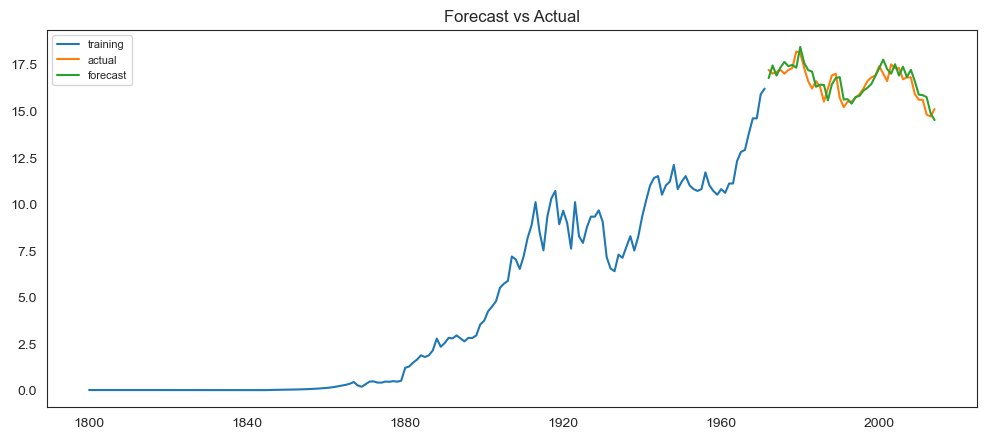

In [126]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_a["CO2"], label='training')
plt.plot(test_a["CO2"], label='actual')
plt.plot(pred_sarimax, label='forecast')
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [127]:
#RMSE Value
RMSE_SARIMAX_a = RMSE_Value(pred_sarimax.values, test_a.values)
print("RMSE_SARIMAX_a:",RMSE_SARIMAX_a)

#MAPE Value
MAPE_SARIMAX_a = MAPE_Value(pred_sarimax.values, test_a.values)
print("MAPE_SARIMAX_a:",MAPE_SARIMAX_a)

RMSE_SARIMAX_a: 1.1819172044235087
MAPE_SARIMAX_a: 0.05790272044172995


# LSTM using RNN

In [128]:
scaler = MinMaxScaler()

In [129]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [130]:
scaled_train[:10]

array([[0.5615942 ],
       [0.56159058],
       [0.56159058],
       [0.56158877],
       [0.56158696],
       [0.56159058],
       [0.56158514],
       [0.56158696],
       [0.56158514],
       [0.56158696]])

In [131]:
n_input = 5
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [132]:
X,y = generator[0]
print(f'given the array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

given the array: 
[0.5615942  0.56159058 0.56159058 0.56158877 0.56158696]
predict this y: 
 [[0.56159058]]


In [133]:
model = Sequential()
model.add(LSTM(60, activation = 'relu',return_sequences = True, input_shape=(n_input,n_features)))
model.add(Dropout(0.2))

model.add(LSTM(60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(60, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 60)             14880     
                                                                 
 dropout (Dropout)           (None, 5, 60)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 60)             29040     
                                                                 
 dropout_1 (Dropout)         (None, 5, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 60)             29040     
                                                                 
 dropout_2 (Dropout)         (None, 5, 60)             0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                2

In [134]:
model.fit(generator,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
154/154 [==============================] - 15s 15ms/step - loss: 0.0750
Epoch 2/50
154/154 [==============================] - 2s 16ms/step - loss: 0.0339
Epoch 3/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0313
Epoch 4/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0348
Epoch 5/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0272
Epoch 6/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0296
Epoch 7/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0299
Epoch 8/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0285
Epoch 9/50
154/154 [==============================] - 2s 16ms/step - loss: 0.0268
Epoch 10/50
154/154 [==============================] - 3s 16ms/step - loss: 0.0294
Epoch 11/50
154/154 [==============================] - 2s 15ms/step - loss: 0.0274
Epoch 12/50
154/154 [==============================] - 2s 14ms/step - loss: 0.0271
Epoch 13/50


Text(0.5, 1.0, 'Loss per Epochs')

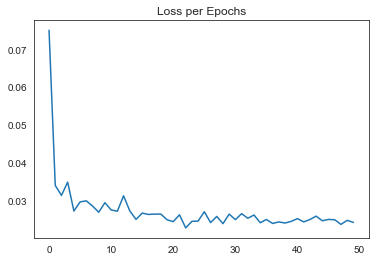

In [135]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title('Loss per Epochs')

In [136]:
last_train_batch = scaled_train[-5:]

In [137]:
last_train_batch = last_train_batch.reshape(1,n_input,n_features)

In [138]:
model.predict(last_train_batch)

1/1 [==============================] - 1s 1s/step


array([[0.5723536]], dtype=float32)

In [139]:
scaled_test[0]

array([0.6884058])

In [140]:
test_predictions =[]

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    
    #get the prediction value for first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into the array
    test_predictions.append(current_pred)
    
    #use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis =1)
test_predictions

1/1 [==============================] - 0s 44ms/step


[array([0.5723536], dtype=float32),
 array([0.5723486], dtype=float32),
 array([0.5723547], dtype=float32),
 array([0.5723516], dtype=float32),
 array([0.57233286], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 array([0.57232535], dtype=float32),
 arra

In [141]:
true_predictions = scaler.inverse_transform(test_predictions)

In [142]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Year'>

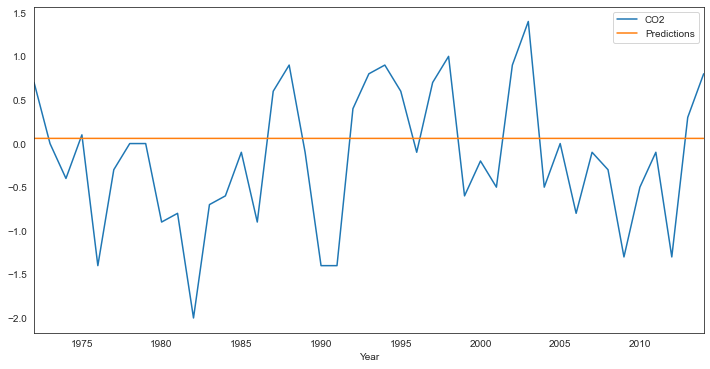

In [143]:
test.plot(figsize=(12,6))

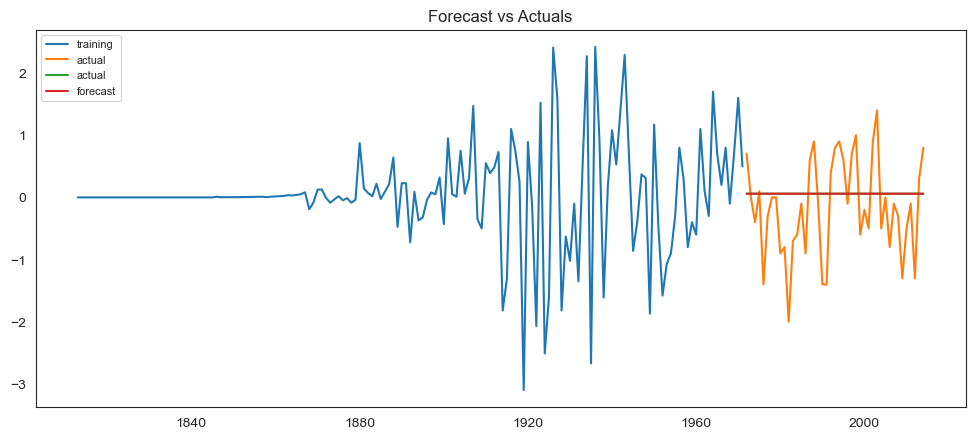

In [144]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(test['Predictions'], label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [145]:
RMSE_lstm = RMSE_Value(test['Predictions'],test.CO2)
print("RMSE_AR",RMSE_lstm)
#MAPE Value
MAPE_lstm = MAPE_Value(test['Predictions'], test.CO2)
print("MAPE_AR:",MAPE_lstm)

RMSE_AR 0.8095929655891175
MAPE_AR: inf


# Comparison of Models :

In [146]:
compare_model = {"MODEL":pd.Series(["Single Exponential","Holts Winter","Holts winter exp add sea and add trend","Holts winter exp mul sea and add trend","Holts winter exp mul sea and mul trend","Linear Model","Exponential Model","Quadratic Model","ARIMA Model(0,2,3)","Auto Regressor","Moving Average","ARIMA(3,1,4)","SARIMAX(3,1,4)","SARIMAX(0,2,3)","LSTM(RNN)"]),
                 "RMSE_Values" :pd.Series([rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,rmse_hwe_model_mul_add_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model,RMSE_ARIMA ,RMSE_AR,RMSE_MA,RMSE_ARIMA_a,RMSE_SARIMAX_a,RMSE_SARIMAX_1,RMSE_lstm]),
                 "MAPE_Values" :pd.Series([MAPE_ses_model,MAPE_hw_model,MAPE_hwe_add_add_model,MAPE_hwe_model_mul_add_model,MAPE_hwe_model_mul_add_model,MAPE_linear_model,MAPE_Exp_model,MAPE_Quad_model,MAPE_ARIMA ,MAPE_AR,MAPE_MA,MAPE_ARIMA_a,MAPE_SARIMAX_a,MAPE_SARIMAX_1,MAPE_lstm])
                }
table_rmse=pd.DataFrame(compare_model)
table_rmse.sort_values(['MAPE_Values']) 

,MODEL,RMSE_Values,MAPE_Values
11,"ARIMA(3,1,4)",0.848325,0.044454
0,Single Exponential,0.937572,0.048941
12,"SARIMAX(3,1,4)",1.181917,0.057903
13,"SARIMAX(0,2,3)",2.619509,0.114576
2,Holts winter exp add sea and add trend,2.457411,0.127488
5,Linear Model,3.144516,0.164839
7,Quadratic Model,4.495138,0.231502
1,Holts Winter,13.375196,0.704964
3,Holts winter exp mul sea and add trend,137.065152,6.409096
4,Holts winter exp mul sea and mul trend,137.065152,6.409096


In [147]:
#After comparing all RMSE and MAPE values of above models we have found that 
#ARIMA model (3,1,4) has least MAPE value = 0.0444 and RMSE value=0.8483
#we are considering ARIMA model (3,1,4) as our final model.

# Final Model:

In [148]:
final_arima = ARIMA(df2['CO2'],order = (3,1,4))
final_arima = final_arima.fit()
final_arima.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -167.004
Date:                Mon, 22 Aug 2022   AIC                            350.008
Time:                        17:10:29   BIC                            376.935
Sample:                    01-01-1800   HQIC                           360.889
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4703      0.189      7.780      0.000       1.100       1.841
ar.L2         -0.0905      0.363     -0.249      0.803      -0.801       0.620
ar.L3         -0.4550      0.188     -2.415      0.016      -0.824      -0.086
ma.L1         -1.5536      0.196     -7.928      0.000      -1.938      -1.170
ma.L2          0.0568      0.360      0.158      0.875      -0.649       0.762
ma.L3          0.8017      0.185      4.322      0.000       0.438       1.165
ma.L4         -0.2324      0.051     -4.521      0.000      -0.333      -0.132
sigma2         0.2758      0.021     13.204      0.000       0.235       0.317
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                78.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):             230.74   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
fitted = final_arima.fittedvalues.head(100)

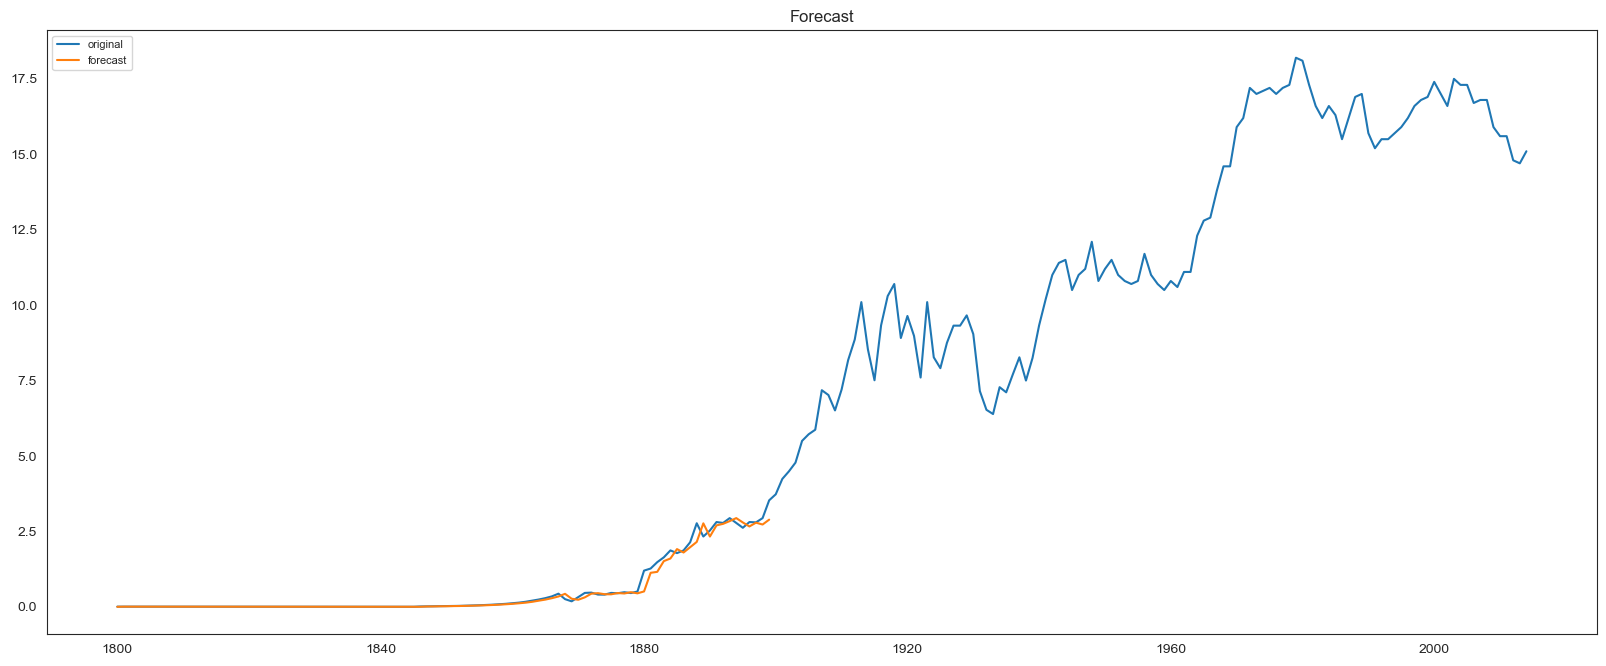

In [150]:
plt.figure(figsize=(20,8), dpi=100)
plt.plot(df2, label='original')
plt.plot(fitted, label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [151]:
#Forecasting for next 5 years

pred_5=final_arima.forecast(5)

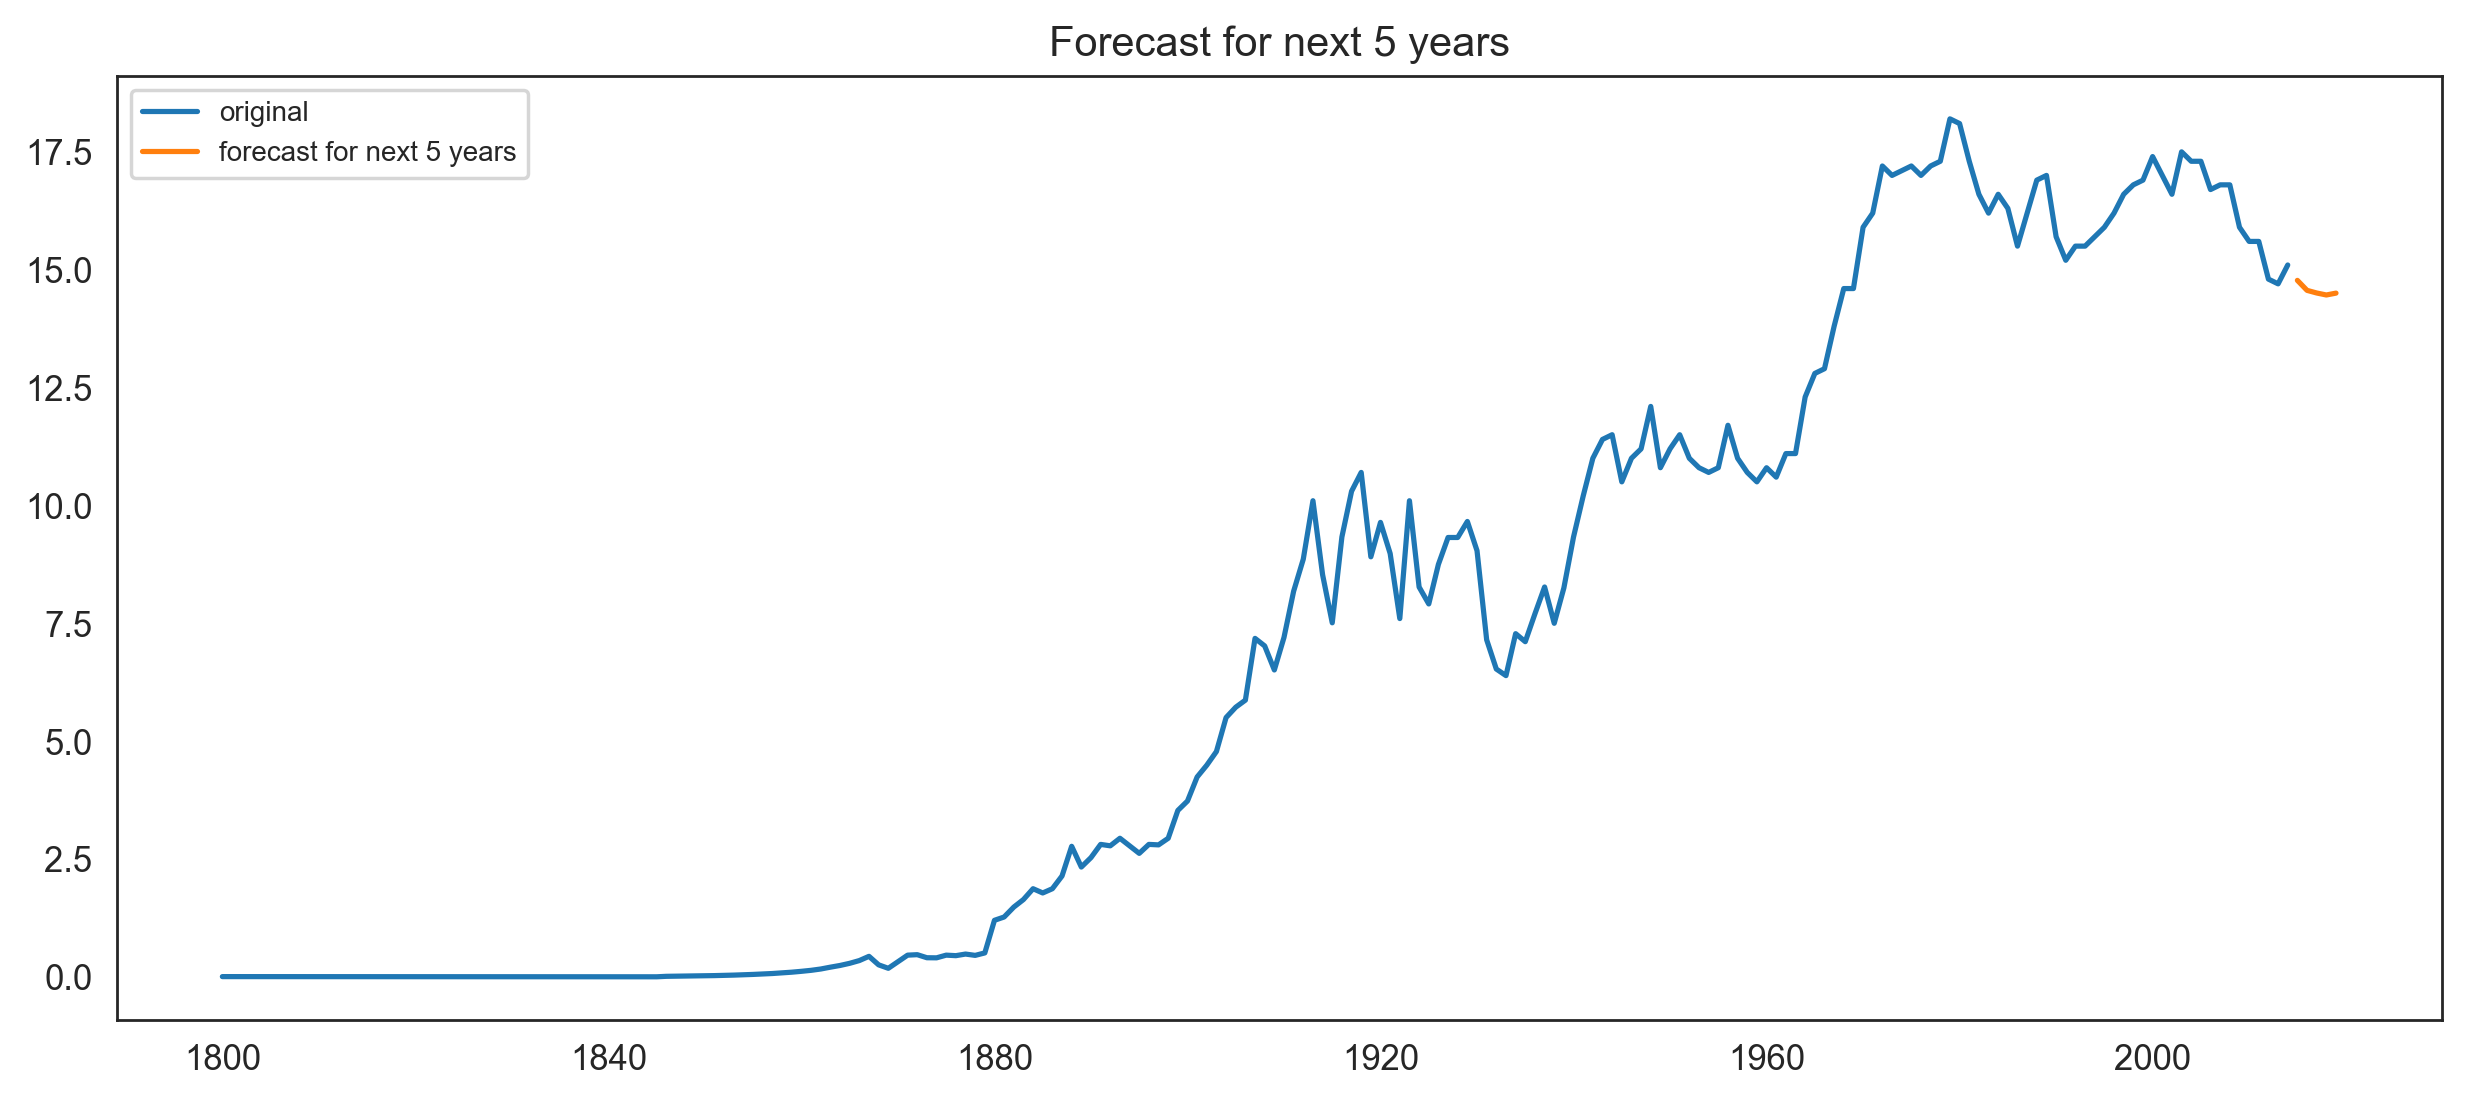

In [152]:
plt.figure(figsize=(12,5), dpi=250)
plt.plot(df2, label='original')
plt.plot(pred_5, label='forecast for next 5 years')
plt.title('Forecast for next 5 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [153]:
final_arima.forecast(10)

2015-01-01    14.773707
2016-01-01    14.561916
2017-01-01    14.505956
2018-01-01    14.463781
2019-01-01    14.503205
2020-01-01    14.590449
2021-01-01    14.734349
2022-01-01    14.920093
2023-01-01    15.140476
2024-01-01    15.382221
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [154]:
pred_10= final_arima.forecast(10)

In [155]:
pred_10

2015-01-01    14.773707
2016-01-01    14.561916
2017-01-01    14.505956
2018-01-01    14.463781
2019-01-01    14.503205
2020-01-01    14.590449
2021-01-01    14.734349
2022-01-01    14.920093
2023-01-01    15.140476
2024-01-01    15.382221
Freq: AS-JAN, Name: predicted_mean, dtype: float64

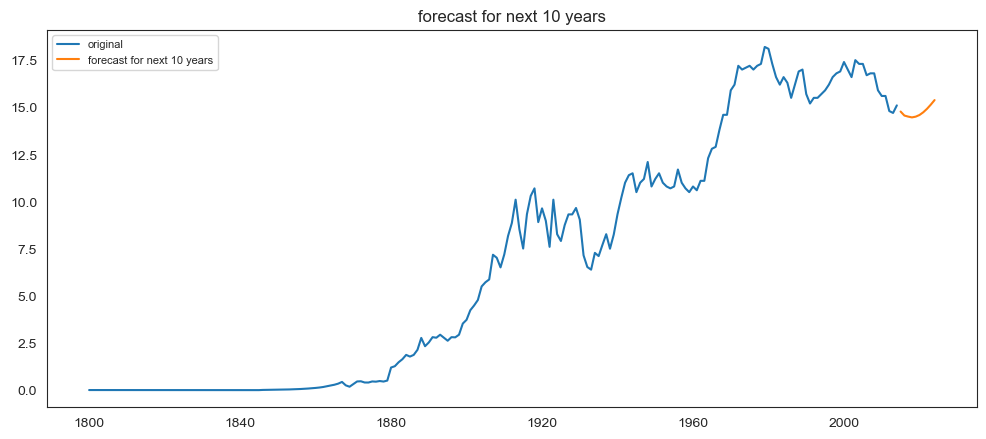

In [156]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df2, label='original')
plt.plot(pred_10, label='forecast for next 10 years')
plt.title('forecast for next 10 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [157]:
pred_15= final_arima.forecast(15)

In [158]:
pred_15

2015-01-01    14.773707
2016-01-01    14.561916
2017-01-01    14.505956
2018-01-01    14.463781
2019-01-01    14.503205
2020-01-01    14.590449
2021-01-01    14.734349
2022-01-01    14.920093
2023-01-01    15.140476
2024-01-01    15.382221
2025-01-01    15.633202
2026-01-01    15.880068
2027-01-01    16.110327
2028-01-01    16.312338
2029-01-01    16.476192
Freq: AS-JAN, Name: predicted_mean, dtype: float64

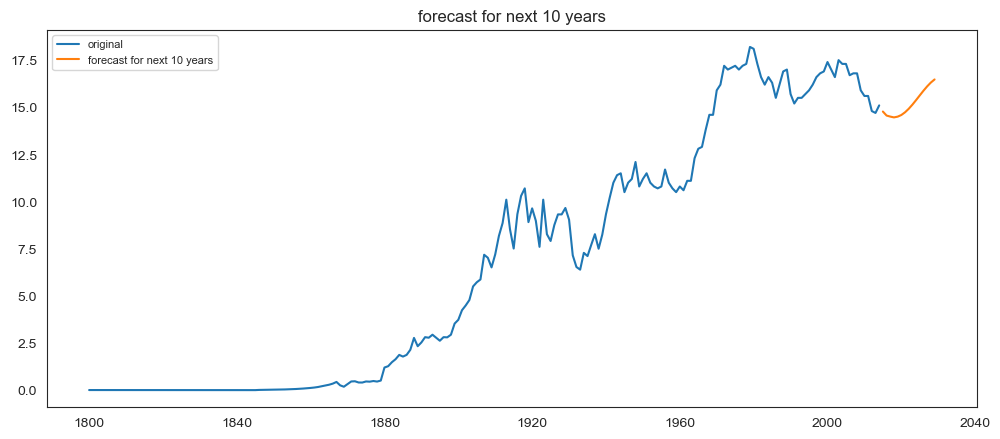

In [159]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df2, label='original')
plt.plot(pred_15, label='forecast for next 10 years')
plt.title('forecast for next 10 years')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [160]:
#!pip install streamlit

In [161]:
from pickle import load
from pickle import dump

In [162]:
# Exporting to csv file
pred_10.to_csv(r'CO2_forecast_data_10years.csv',index=True)

In [163]:
# Saving the pickle file
import pickle
pickle.dump(final_arima, open('Forecast_arima.pkl','wb'))